<center><h1>Hou_Shengtao_HW6</h1></center>

Name: Shengtao Hou  
<br>
Github Username: Tonyhou521 
<br>
USC ID: 9712707229 

## 1. Tree-Based Methods

Import packages

In [105]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

### (a) Download the APS Failure data

In [106]:
folder_path = '../data/Homework 6 Data/'
# Read in the data
df_test = pd.read_csv(folder_path + 'aps_failure_test_set.csv',na_values='na',skiprows=20)
df_train = pd.read_csv(folder_path + 'aps_failure_training_set.csv',na_values='na',skiprows=20)


In [107]:
## Check shape and print first 10 rows of the data
print(df_test.shape)
print(df_train.shape)


(16000, 171)
(60000, 171)


In [108]:
display(df_test)

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

In [109]:
display(df_train)

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

According to the official Scikit-learn documentations:  https://scikit-learn.org/stable/modules/impute.html
SimpleImputer: This is a basic imputation method that replaces missing values with a specified constant value or a statistic such as the mean, median, or most frequent value of each column.

IterativeImputer: This is a more advanced imputation method that models each feature with missing values as a function of other features. It uses an iterative process to refine the estimates of the missing values, taking into account the relationships between features.

KNNImputer: This method imputes missing values based on the mean or median of the k-nearest observed neighbors. It leverages the k-nearest neighbors algorithm to estimate the missing values, considering the feature similarity between data points.

In [110]:
from IPython.display import IFrame
IFrame('https://scikit-learn.org/stable/modules/impute.html', width=1500, height=700)

I would love to use KNNImpute method for this HW however I fear that the computation time would be enormous and due to the fact I'm running this HW locally I will be using univariate imputation by calculating the mean to fill the missing data.

Update: I still went with KNNImpute

In [111]:
## Univariate feature imputation
def univariateImpute(df_train,df_test):
    cols_to_impute = df_train.columns[1:]
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(df_train[cols_to_impute])
    df_train[cols_to_impute] = imputer.transform(df_train[cols_to_impute])
    df_test[cols_to_impute] = imputer.transform(df_test[cols_to_impute])
    return df_train,df_test

def knnImpute(df_train,df_test,k):
    cols_to_impute = df_train.columns[1:]
    imputer = KNNImputer(n_neighbors=k, weights='uniform',missing_values=np.nan)
    imputer.fit(df_train[cols_to_impute])
    df_train[cols_to_impute] = imputer.transform(df_train[cols_to_impute])
    df_test[cols_to_impute] = imputer.transform(df_test[cols_to_impute])
    return df_train,df_test

#imputed_train,imputed_test = knnImpute(df_train,df_test,5)
imputed_train,imputed_test = univariateImpute(df_train,df_test)
# imputed_test = univariateImpute(df_test)
# imputed_train = univariateImpute(df_train)

In [112]:
display(imputed_test)

class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg     60.0     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg     82.0     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg  66002.0     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg  59816.0     0.0  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg   1814.0     0.0  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...      ...     ...           ...     ...     ...     ...     ...   
15995   neg  81852.0     0.0  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg    110.0     0.0  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

In [113]:
display(imputed_train)

class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2       neg   41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...       ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002.0     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286.0     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292.0     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222.0     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

#### (ii) Calculate the coefficient of variation

In [114]:
def cv(df):
    temp = df.describe()
    ## get std and mean
    std = temp.loc['std']
    mean = temp.loc['mean']
    ## compute cv
    cv = std/mean
    temp.loc['cv'] = cv
    return temp.loc[['mean','std','cv']]

In [115]:
cv_train = cv(imputed_train)

In [116]:
cv(imputed_train)

aa_000     ab_000        ac_000        ad_000      ae_000  \
mean   59336.499567   0.162500  3.362258e+08  1.434383e+05    6.535000   
std   145430.056532   1.687318  7.767625e+08  3.504525e+07  158.147893   
cv         2.450938  10.383494  2.310241e+00  2.443228e+02   24.200137   

          af_000        ag_000        ag_001         ag_002         ag_003  \
mean   10.548200    219.157733    964.810433    8509.770600   87600.535267   
std   205.387115  20363.644580  34008.905467  149481.840081  757517.085558   
cv     19.471295     92.917755     35.249314      17.565907       8.647402   

      ...        ee_002         ee_003        ee_004        ee_005  \
mean  ...  4.431223e+05  210018.844967  4.432268e+05  3.916653e+05   
std   ...  1.149276e+06  540372.543877  1.162002e+06  1.114964e+06   
cv    ...  2.593586e+00       2.572972  2.621687e+00  2.846728e+00   

            ee_006        ee_007         ee_008        ee_009     ef_000  \
mean  3.303672e+05  3.428586e+05  137221.150400   8295.098600   0.086467   
std   1.063465e+06  1.718666e+06  447214.537270  47212.485330   4.268570   
cv    3.219040e+00  5.012754e+00       3.259079      5.691612  49.366659   

         eg_000  
mean   0.203100  
std    8.628043  
cv    42.481747  

[3 rows x 170 columns]

In [117]:
cv_test = cv(imputed_test)

In [118]:
cv(imputed_test)

aa_000    ab_000        ac_000       ad_000      ae_000  \
mean   67996.983750  0.175500  3.373178e+08   361.496375    6.151125   
std   503534.953222  1.276049  7.778039e+08  1351.353042  115.617202   
cv         7.405254  7.270936  2.305849e+00     3.738220   18.796107   

          af_000       ag_000        ag_001         ag_002        ag_003  ...  \
mean    9.756250   119.430875   2039.820250   13629.438250  1.112972e+05  ...   
std   163.627044  6416.435101  88729.281874  234448.094882  1.019838e+06  ...   
cv     16.771510    53.725095     43.498579      17.201596  9.163197e+00  ...   

            ee_002         ee_003        ee_004        ee_005        ee_006  \
mean  4.621401e+05  219891.582875  4.661177e+05  4.228414e+05  3.527620e+05   
std   1.247897e+06  579482.959984  1.260209e+06  1.252242e+06  1.192669e+06   
cv    2.700256e+00       2.635312  2.703629e+00  2.961494e+00  3.380946e+00   

            ee_007         ee_008        ee_009     ef_000     eg_000  
mean  3.486658e+05  142590.354875   8457.630625   0.061875   0.231125  
std   1.619098e+06  533810.806173  52986.877302   3.293342  13.993519  
cv    4.643697e+00       3.743667      6.264979  53.225724  60.545241  

[3 rows x 170 columns]

#### (iii) Plot a correlation matrix

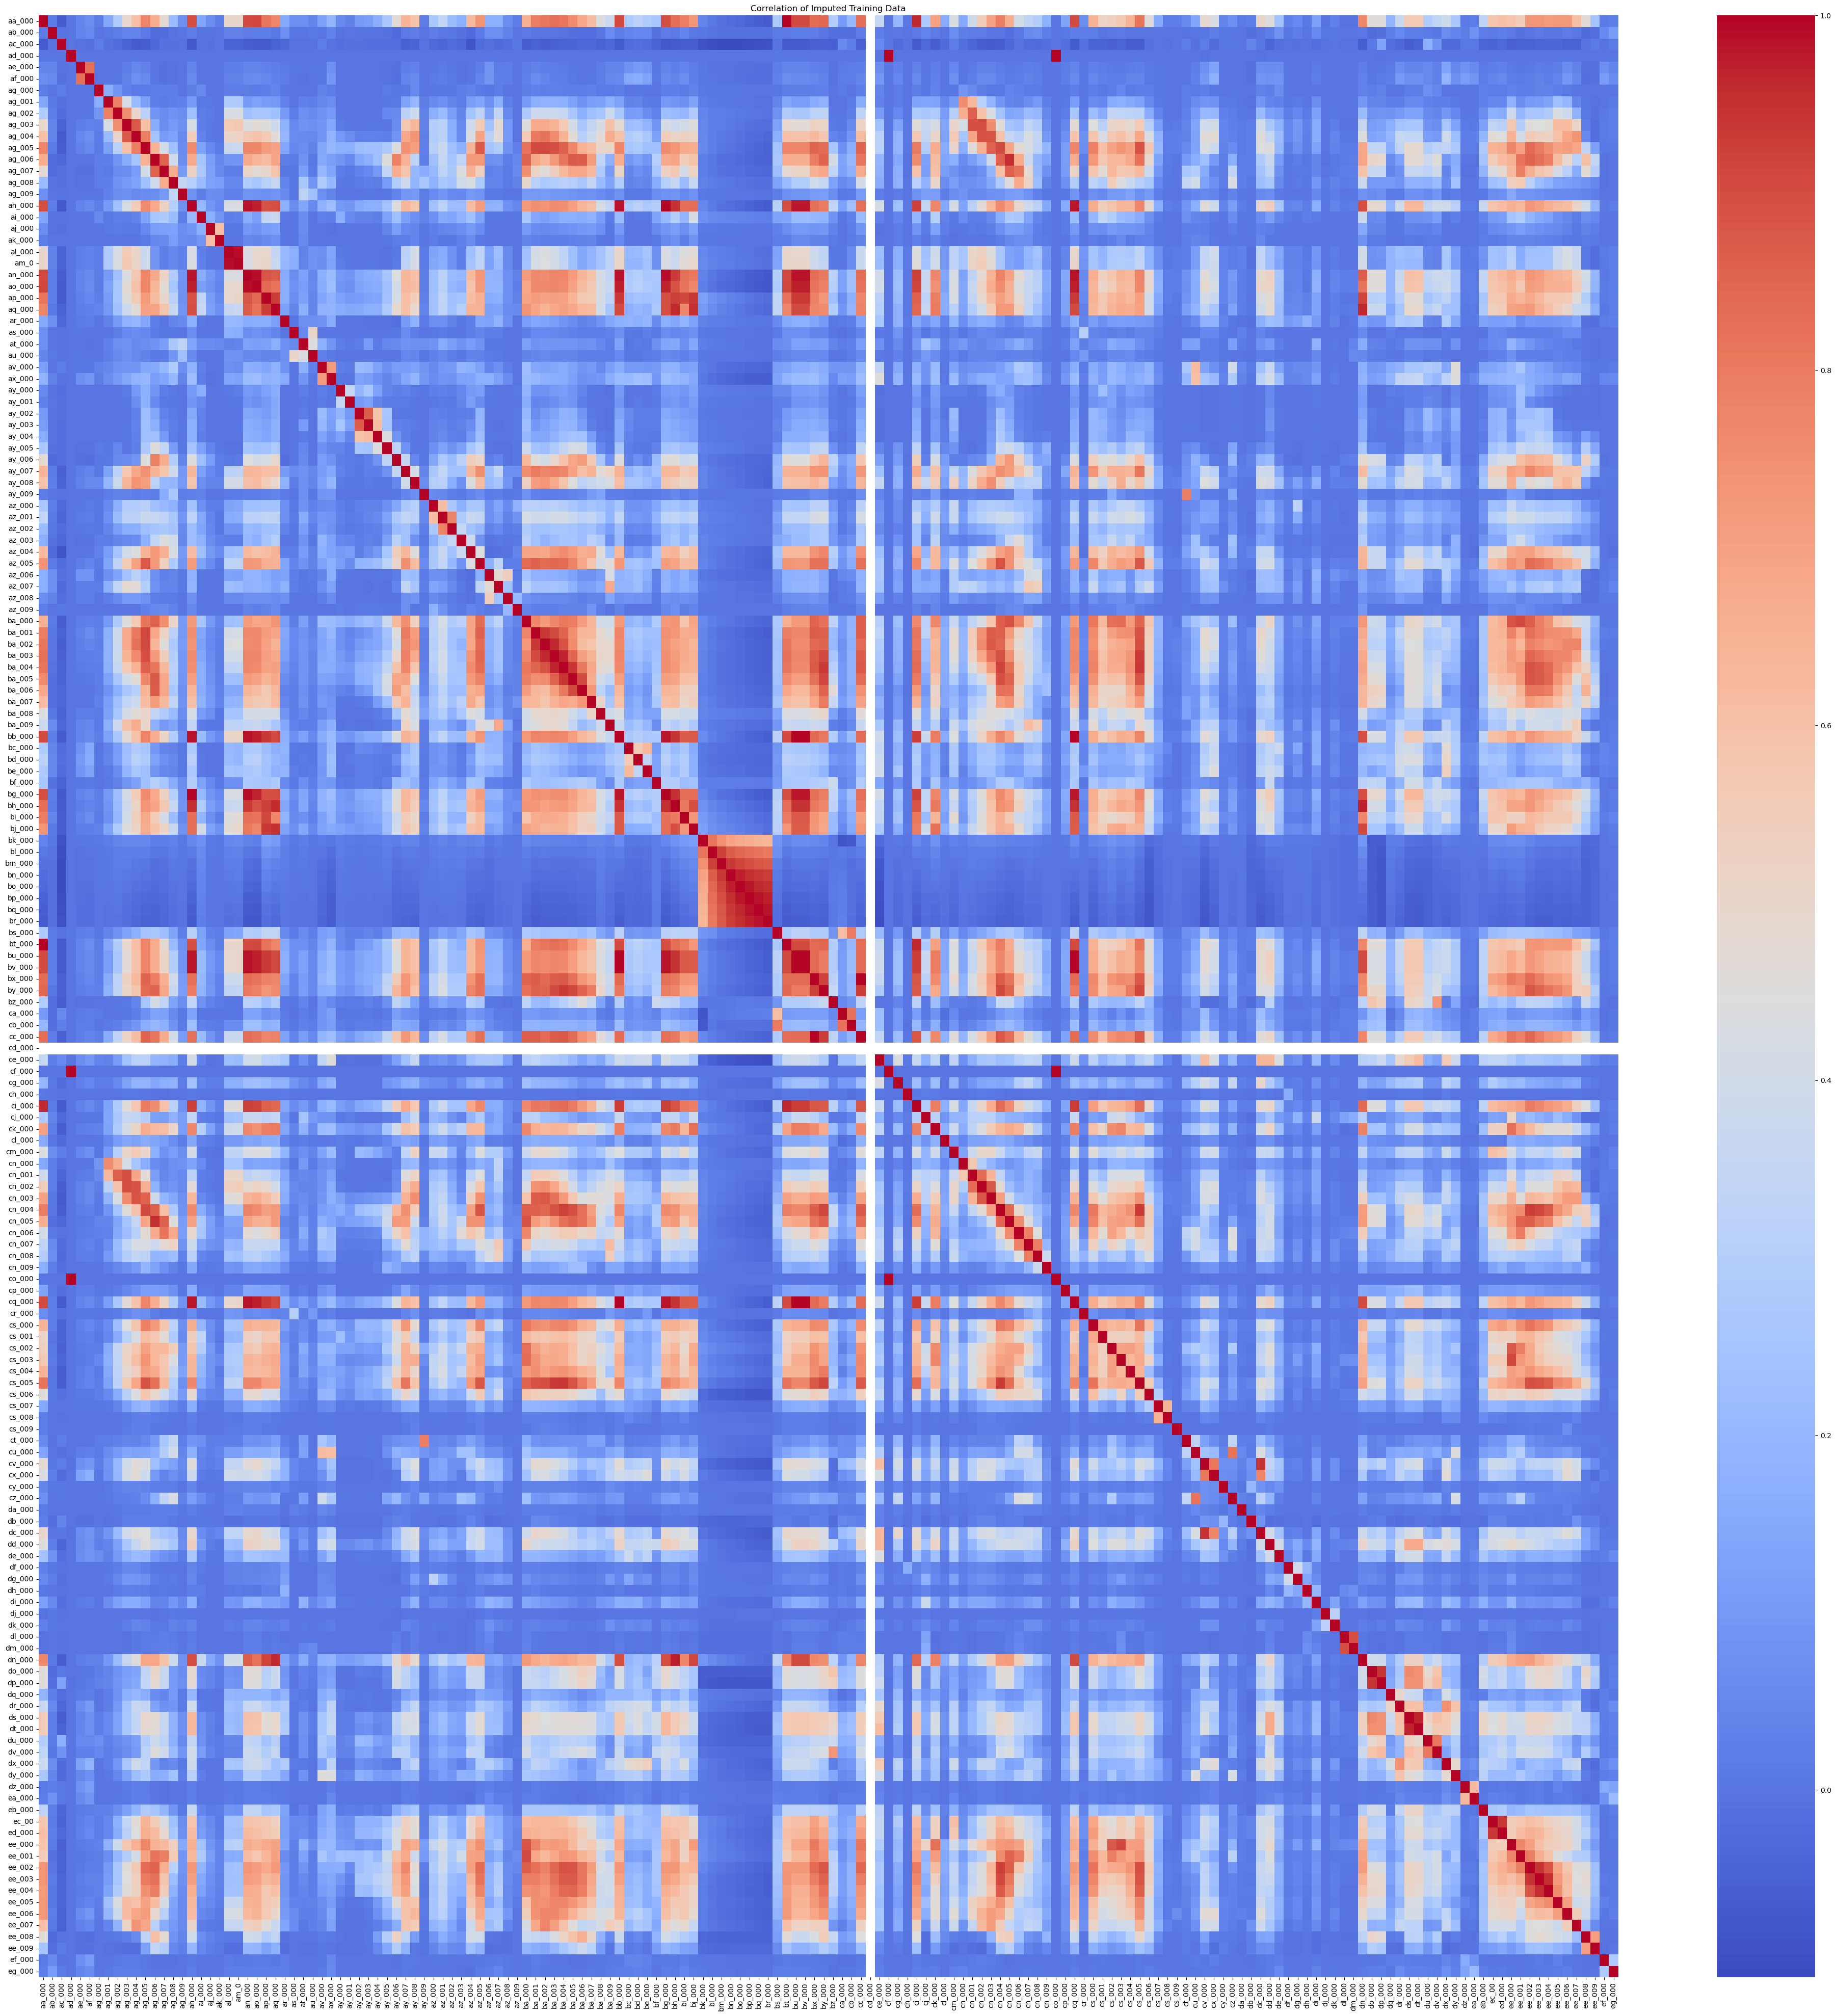

In [119]:
## plot correlation of imputed_train using pandas
tempTrainCorr = imputed_train.drop('class',axis=1)

corr = tempTrainCorr.corr()
plt.figure(figsize=(50,50))
seaborn.heatmap(corr,cmap='coolwarm')
plt.title('Correlation of Imputed Training Data')
plt.show()


#### (iv) Make scatter plots and box plots

In [120]:
## sort the cv

def BIV(cv):
    num = int(np.sqrt(170))
    cv = cv.loc['cv'].sort_values(ascending=False)
    topCV = cv[:num]
    return topCV

def plot(df):
    seaborn.pairplot(df, diag_kind=None,hue ='class')

def boxplot(df):
    num_columns = df.shape[1] - 1  # Subtract 1 to exclude the 'class' column
    fig, axes = plt.subplots(1, num_columns, figsize=(30, 10))
    
    # Exclude the 'class' column when iterating through columns
    feature_columns = [col for col in df.columns if col != 'class']
    
    for i, col in enumerate(feature_columns):
        g = seaborn.boxplot(x='class', y=col, data=df, ax=axes[i])
        g.set(yscale="log")
    
    plt.show()


topCV_train = BIV(cv_train)
topCV_test = BIV(cv_test)

## keep class column
topCVTrain_imputed = imputed_train[topCV_train.index]
class_train = imputed_train['class']
topCVTrain_imputed['class'] = class_train

topCVTest_imputed = imputed_test[topCV_test.index]
class_test = imputed_test['class']
topCVTest_imputed['class'] = class_test

/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_94535/3055558338.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCVTrain_imputed['class'] = class_train
/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_94535/3055558338.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCVTest_imputed['class'] = class_test


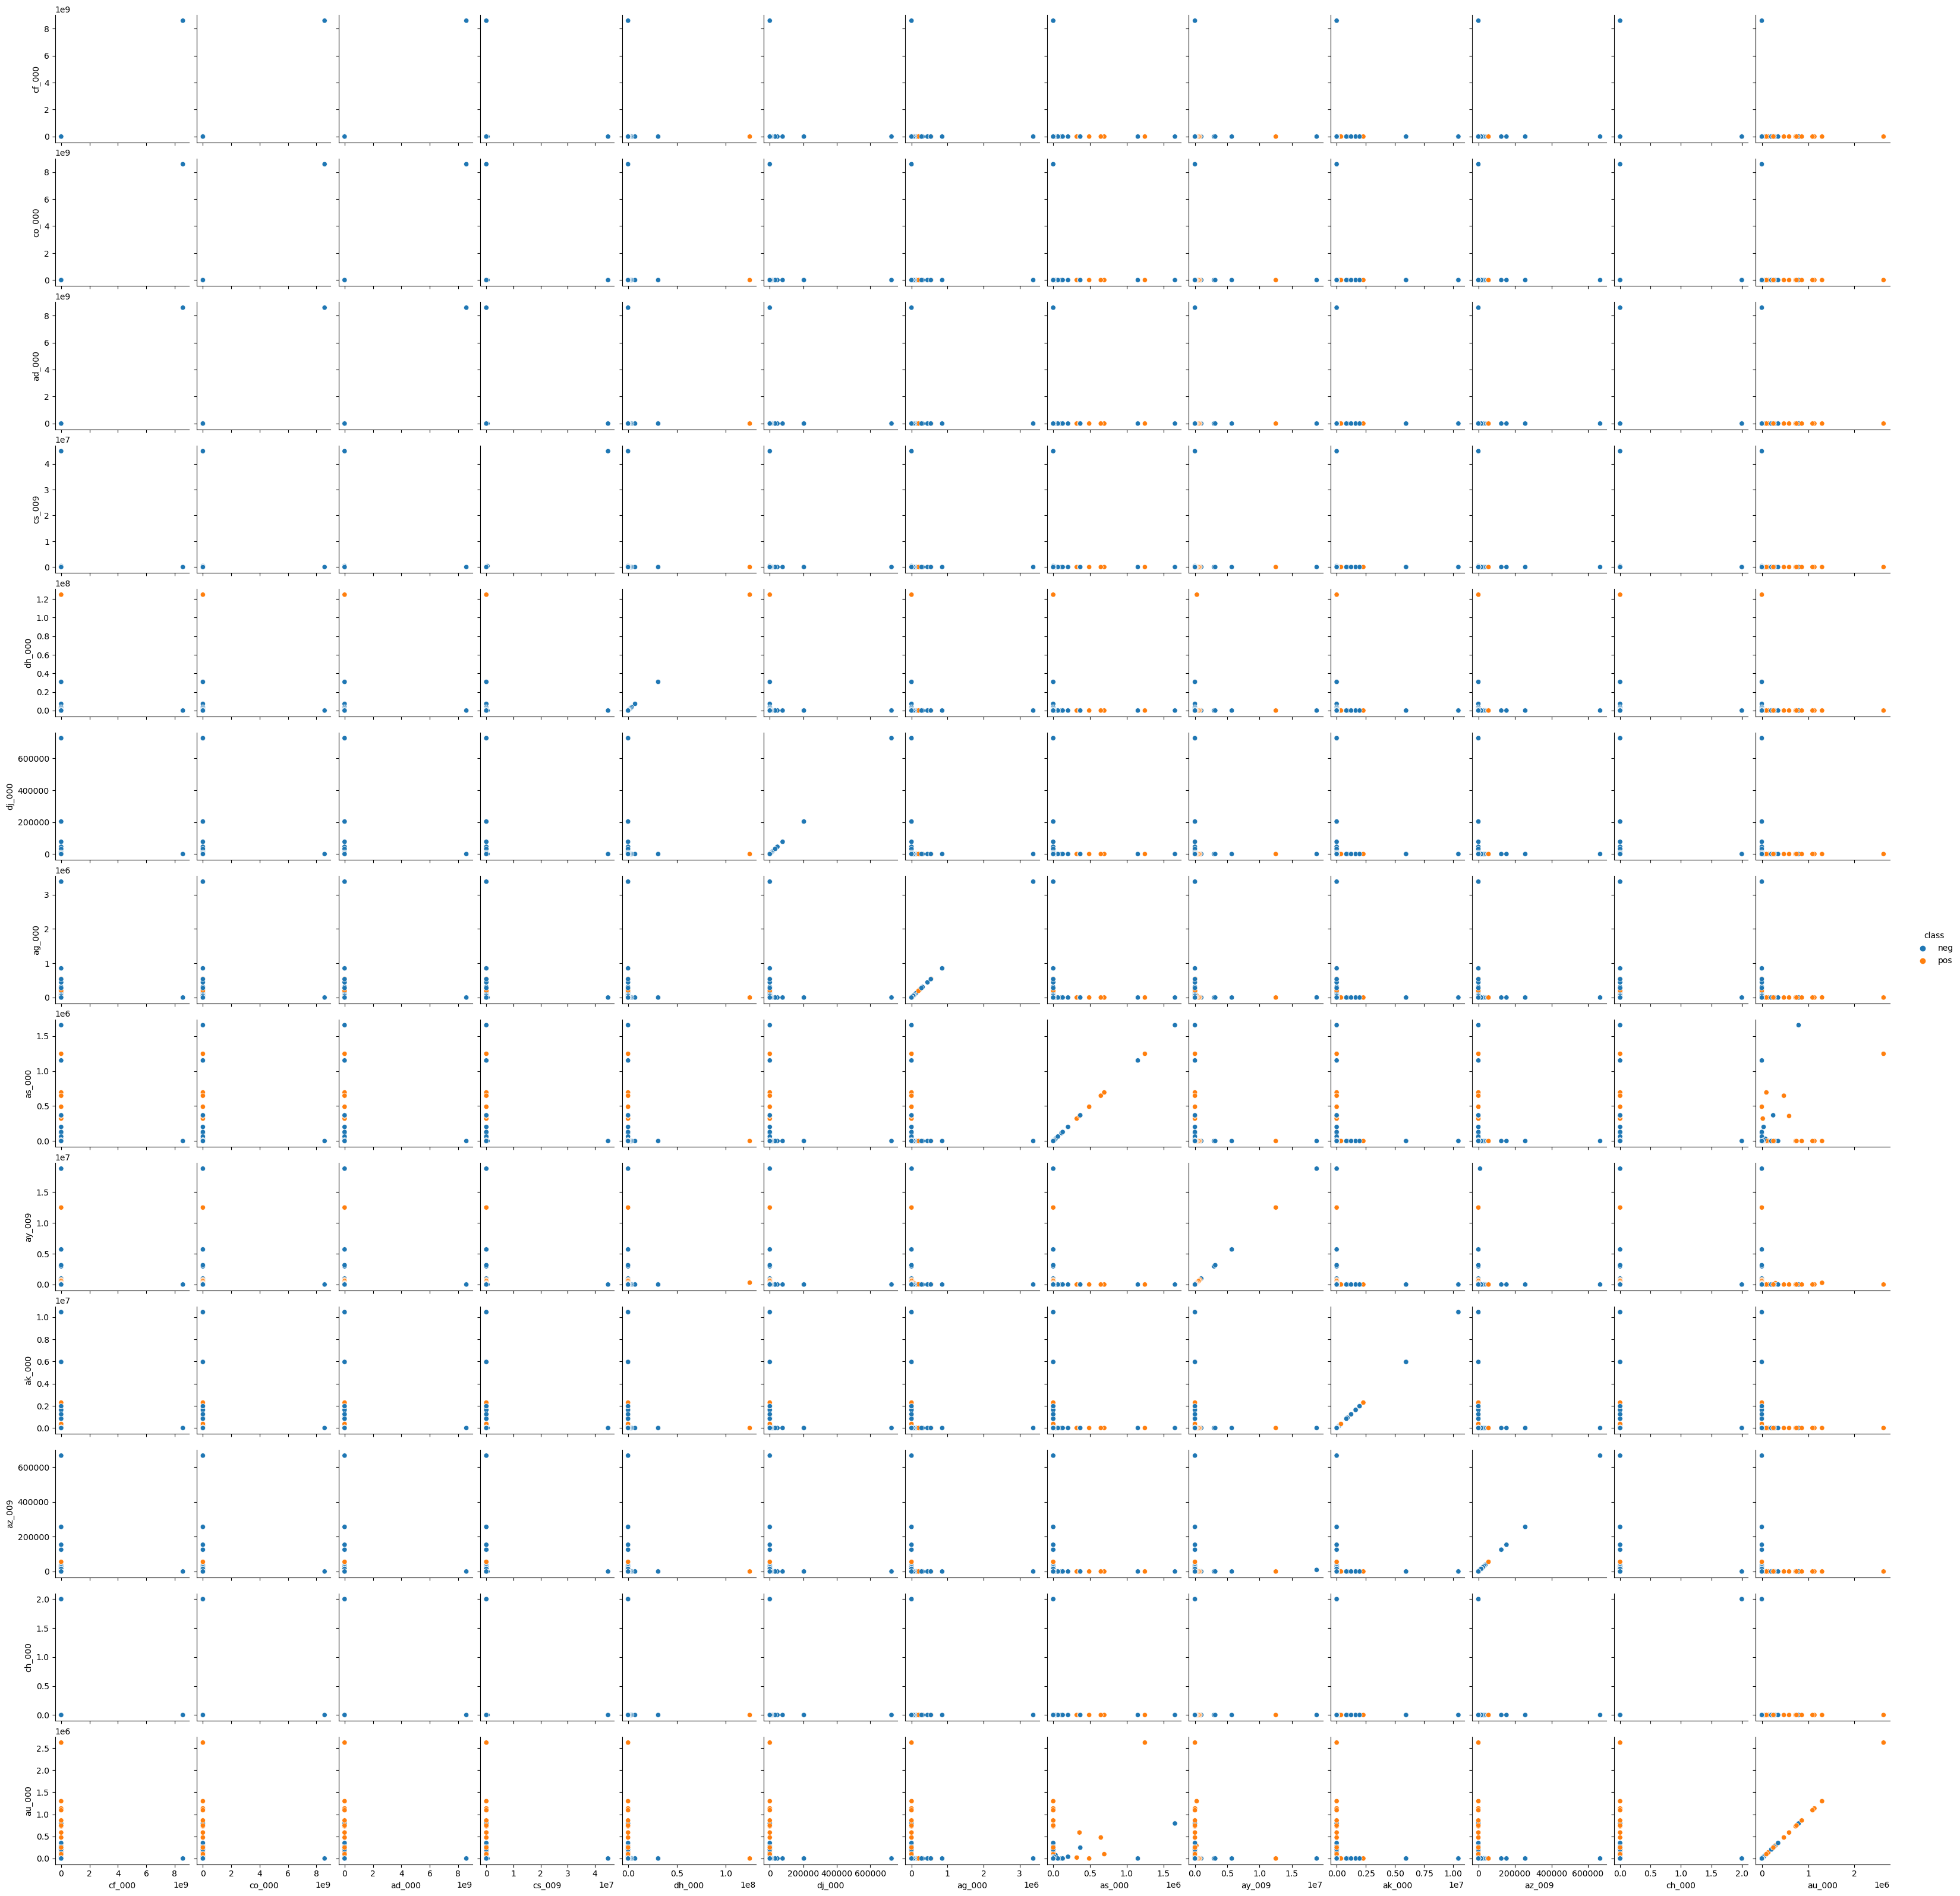

In [121]:
plot(topCVTrain_imputed)

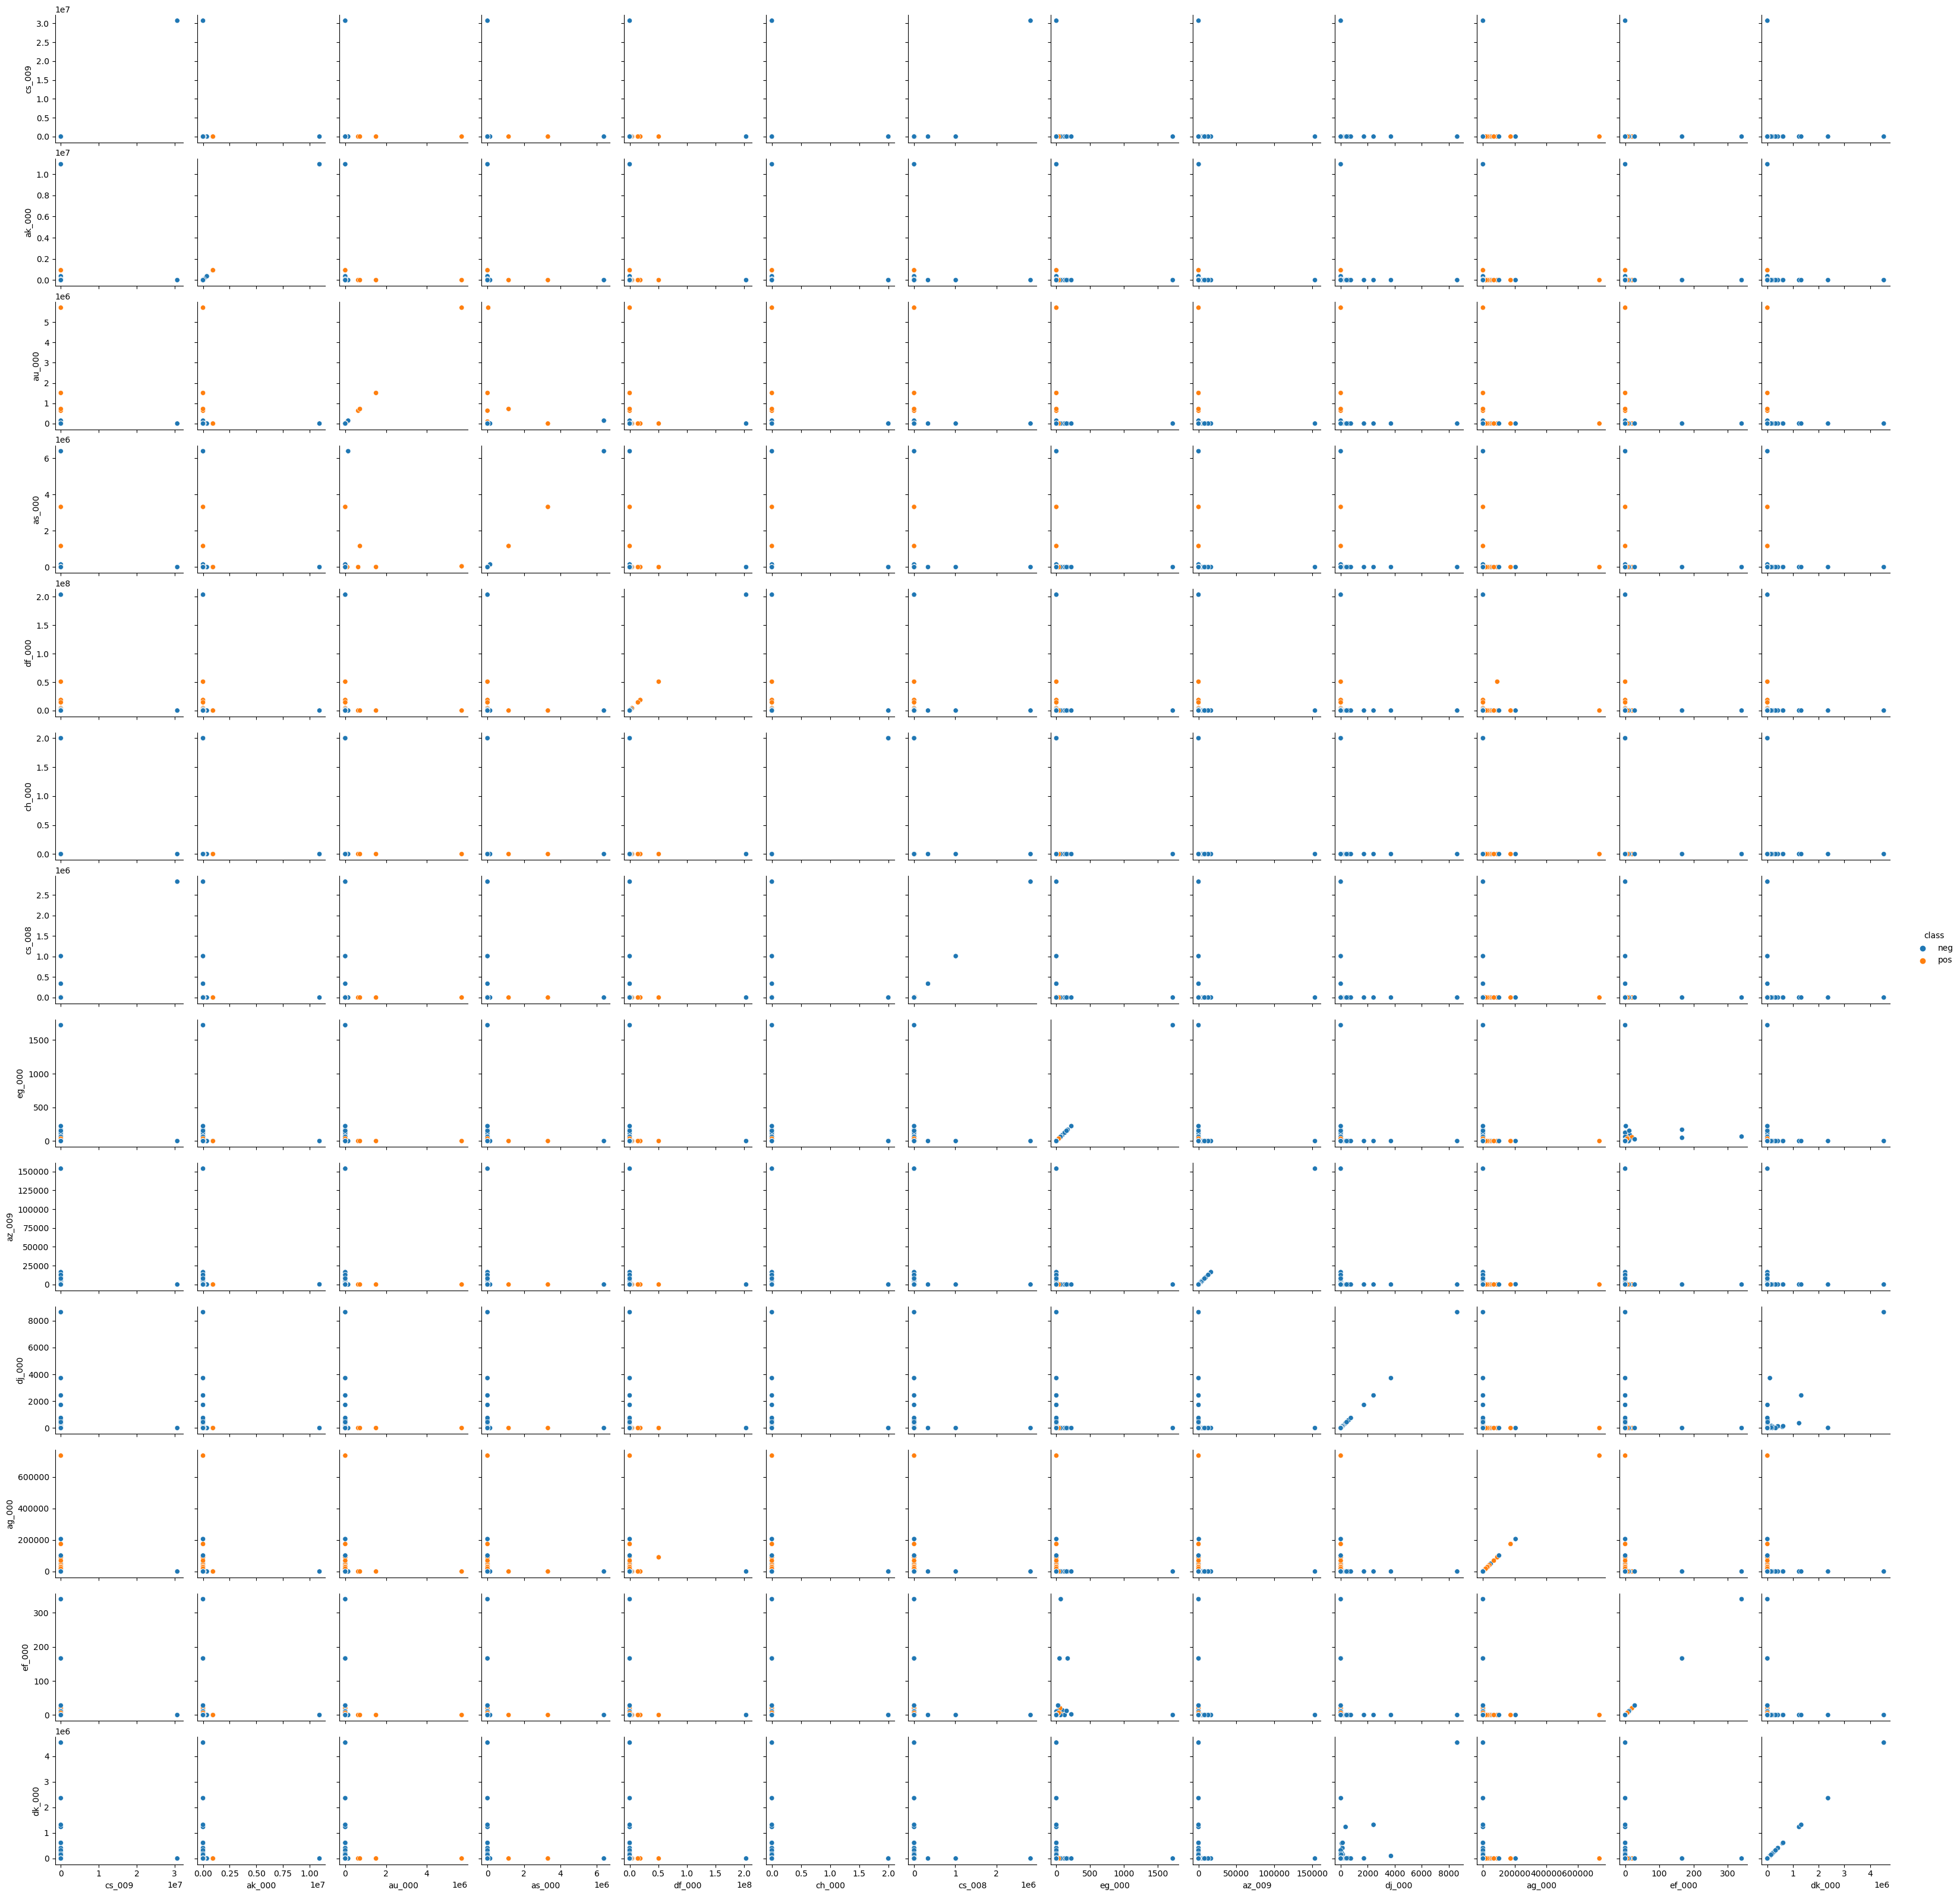

In [122]:
plot(topCVTest_imputed)

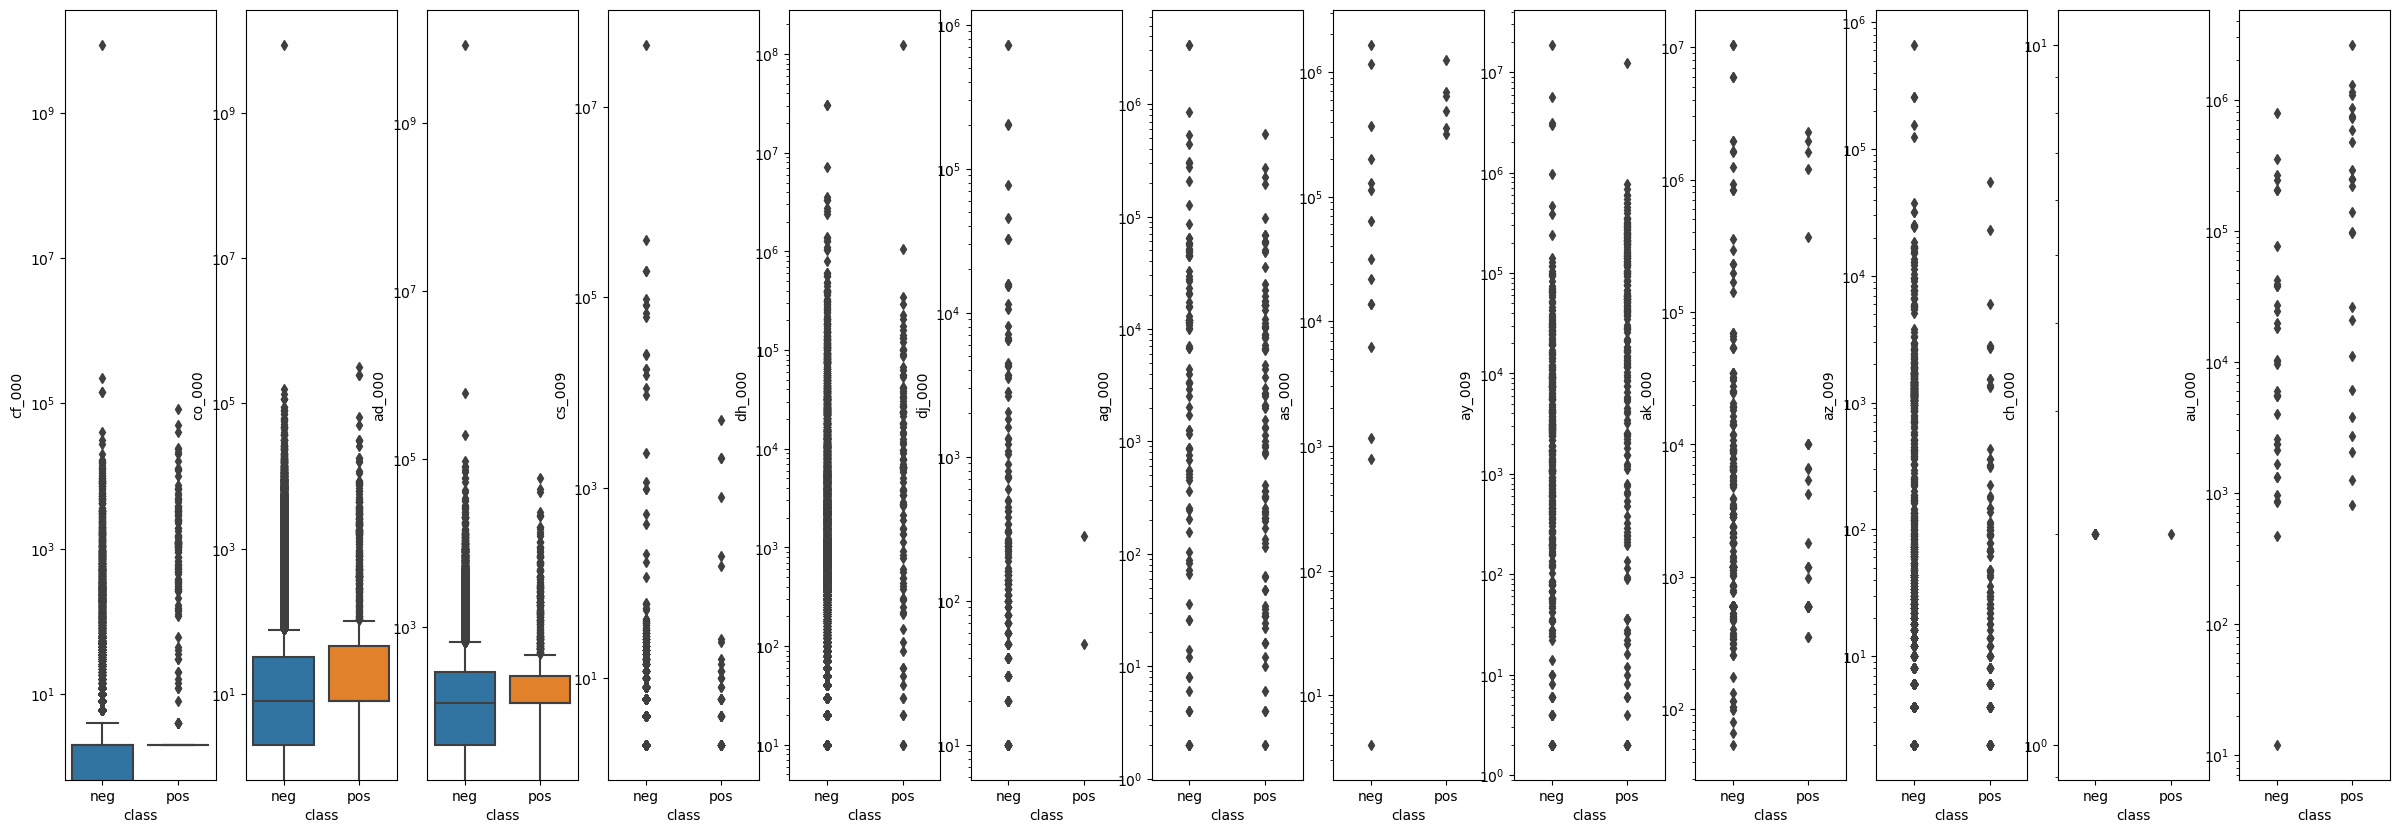

In [123]:
boxplot(topCVTrain_imputed)

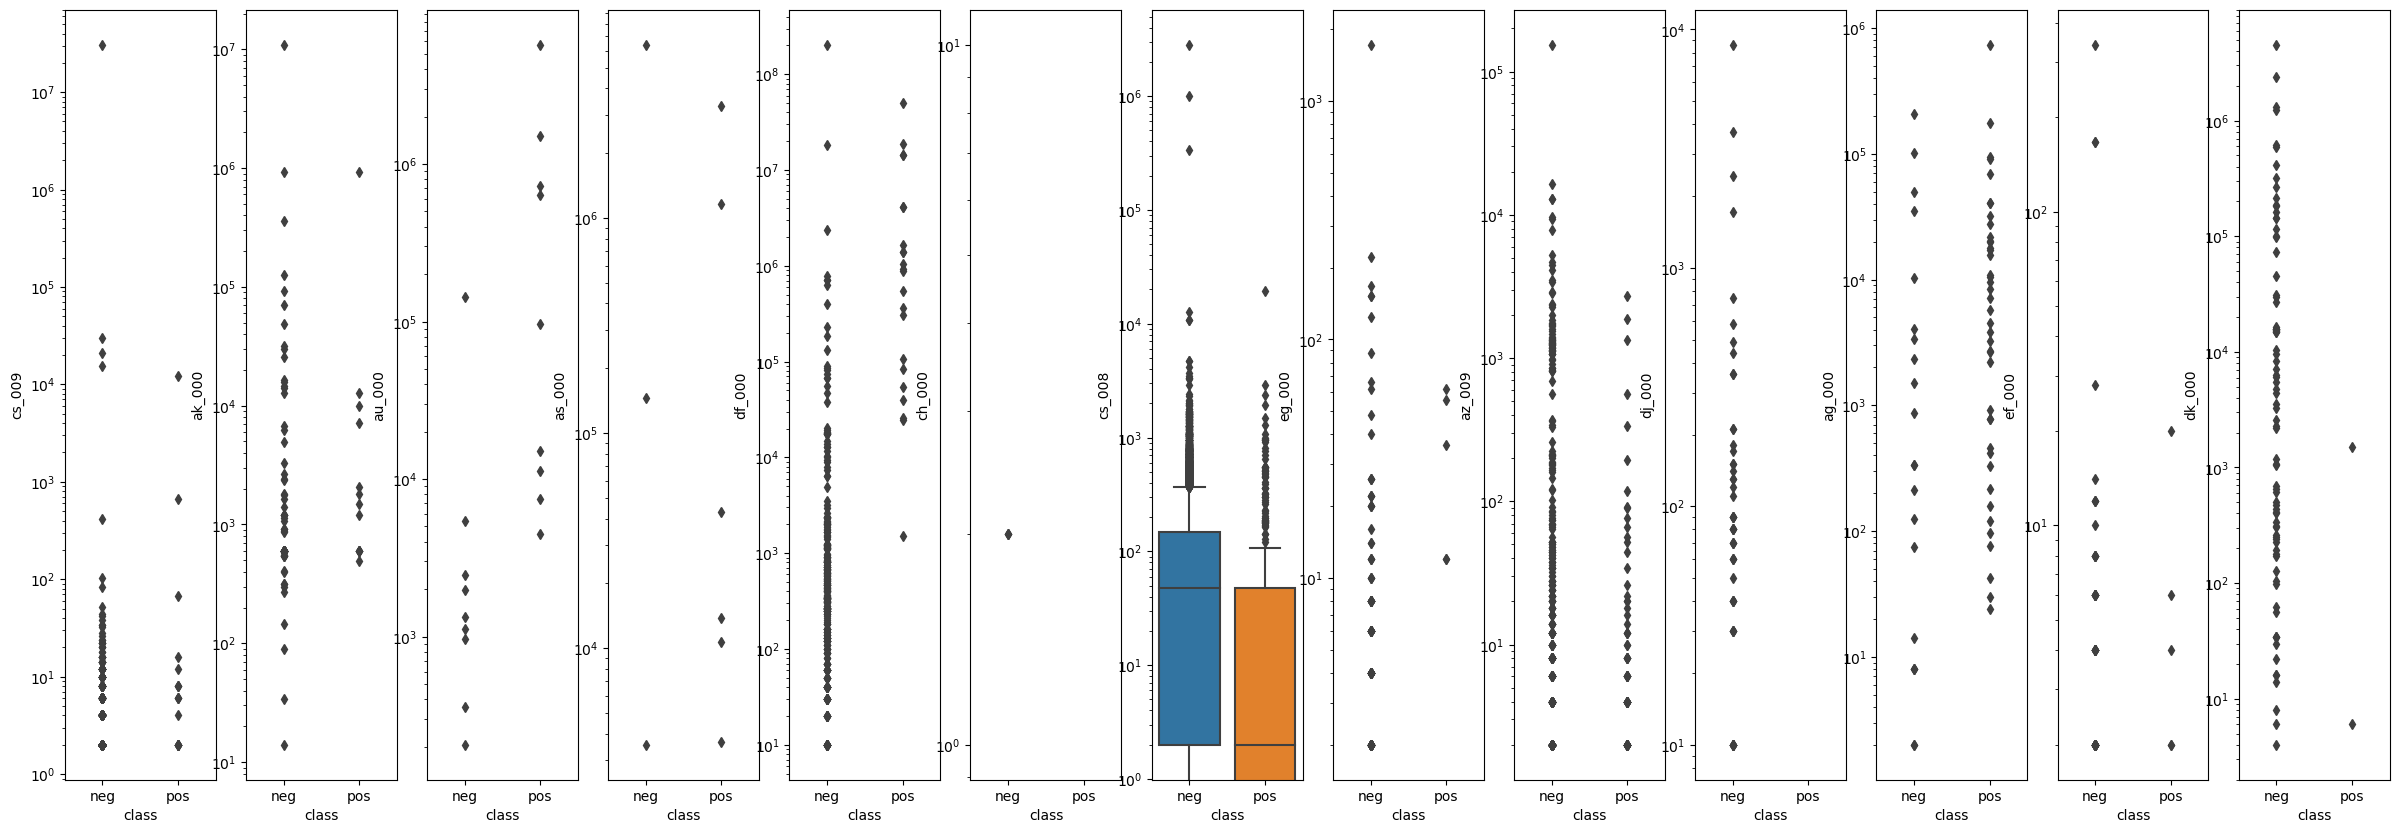

In [124]:
boxplot(topCVTest_imputed)

Ans: Just by looking at the scatterplot, we can see that there are outliers here and there in the graph because we used KNN imputation, we find nearest neighbors and impute the values. However, KNN can be sensitive to outliers in the dataset, as it relies on the distance between the missing value and its nearest neighbors to impute the value. 

#### (v) Is this data set imbalanced?

In [125]:
## imputed_train['class'] pos and neg count
pos = imputed_train[imputed_train['class'] == 'pos']
neg = imputed_train[imputed_train['class'] == 'neg']
print('pos count: ',pos.shape[0])
print('neg count: ',neg.shape[0])
## percentage
print('pos percentage: ',pos.shape[0]/imputed_train.shape[0])
print('neg percentage: ',neg.shape[0]/imputed_train.shape[0])

pos count:  1000
neg count:  59000
pos percentage:  0.016666666666666666
neg percentage:  0.9833333333333333


In [126]:
pos = imputed_test[imputed_test['class'] == 'pos']
neg = imputed_test[imputed_test['class'] == 'neg']
print('pos count: ',pos.shape[0])
print('neg count: ',neg.shape[0])
## percentage
print('pos percentage: ',pos.shape[0]/imputed_test.shape[0])
print('neg percentage: ',neg.shape[0]/imputed_test.shape[0])

pos count:  375
neg count:  15625
pos percentage:  0.0234375
neg percentage:  0.9765625


Both the training and test dataset is highly imbalanced.

### (c) Train a random forest

Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error

[[58974    26]
 [  435   565]]
Accuracy score is:  0.9923
Misclassification rate is:  0.0077
AUC is:  0.9867


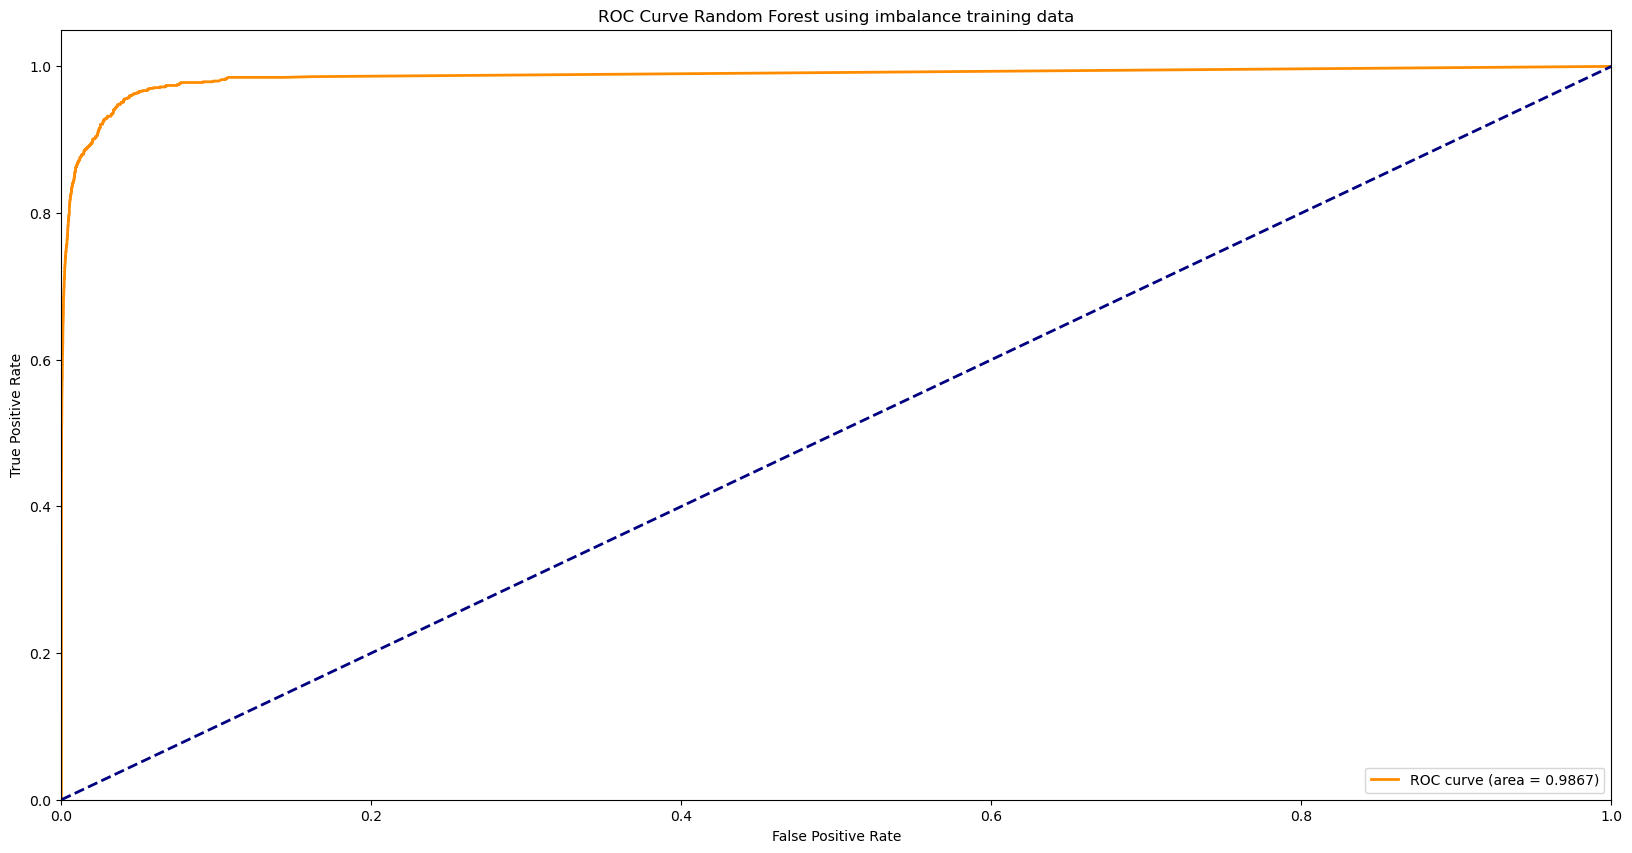

In [127]:
imputed_train_x = imputed_train.drop('class',axis=1)
imputed_train_y = imputed_train['class']

imputed_test_x = imputed_test.drop('class',axis=1)
imputed_test_y = imputed_test['class']

def fit_random_forest(x, y, is_balanced=False):
    if not is_balanced:
        model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          oob_score=True)
    else:
        model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          class_weight='balanced',
                                          oob_score=True)
    model.fit(x, y)
    return model

## --------------------- Random Forest ---------------------

RF_model = fit_random_forest(imputed_train_x, imputed_train_y)
y_predicted = RF_model.predict(imputed_train_x)
y_prob = RF_model.predict_proba(imputed_train_x)


## confusion matrix
print(confusion_matrix(imputed_train_y, y_predicted))
## accuracy
accuracy = round(accuracy_score(imputed_train_y, y_predicted),4)
print("Accuracy score is: ",accuracy)
## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_train_y, y_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest using imbalance training data')
plt.legend(loc="lower right")
plt.show()

## --------------------- END ---------------------


[[15612    13]
 [  179   196]]
Accuracy score is:  0.988
Misclassification rate is:  0.012
AUC is:  0.9942


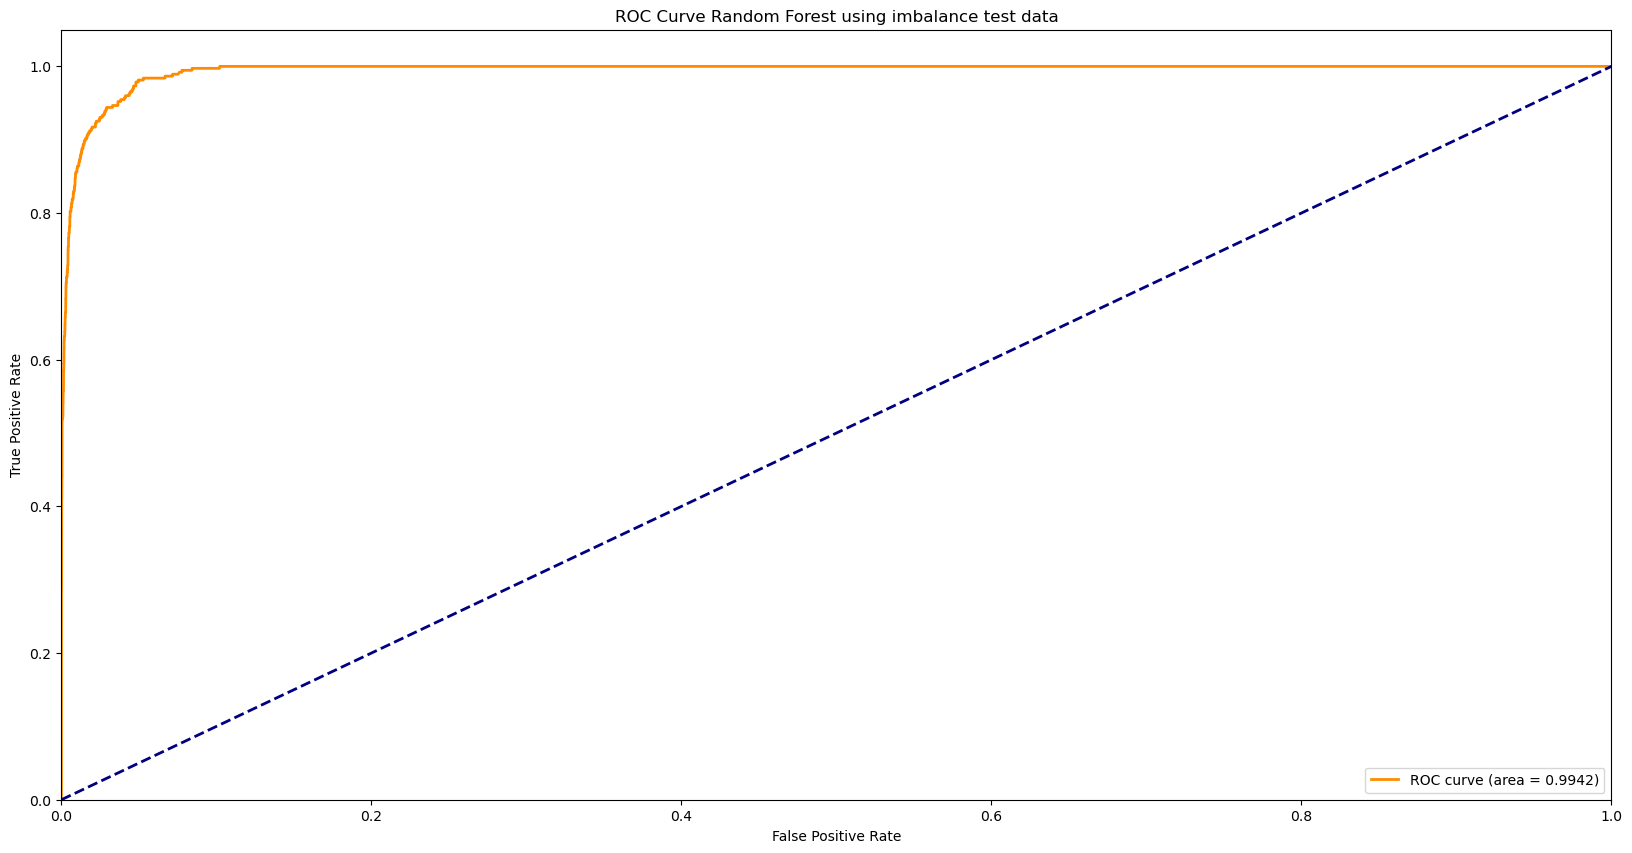

In [128]:
y_predicted = RF_model.predict(imputed_test_x)
y_prob = RF_model.predict_proba(imputed_test_x)

## confusion matrix
print(confusion_matrix(imputed_test_y, y_predicted))
## accuracy
accuracy = round(accuracy_score(imputed_test_y, y_predicted),4)
print("Accuracy score is: ",accuracy)
## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_test_y, y_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest using imbalance test data')
plt.legend(loc="lower right")
plt.show()


In [129]:
print("Out of Bag error is: ",round(1-RF_model.oob_score_,4))
print("Test error is: ",round(1-accuracy,4))

## dataframe out of bag error and test error
df = pd.DataFrame({'Out of Bag error': [round(1-RF_model.oob_score_,4)], 'Test error': [1-accuracy]})
display(df)


Out of Bag error is:  0.0091
Test error is:  0.012


Out of Bag error  Test error
0            0.0091       0.012

### (d) Research class imbalance in random forest

We could either do a balanced class weight or balanced subsampling

Balanced class weights: Random forests allow you to assign weights to classes, which can help balance their influence on the final model. By assigning higher weights to the minority class and lower weights to the majority class, the algorithm takes the imbalance into account during the learning process. In scikit-learn, you can set the class_weight parameter to "balanced" when creating a RandomForestClassifier, which will automatically adjust weights based on the number of samples in each class.

Balanced subsampling: Random forests build multiple decision trees, each trained on a random subset of the data. Balanced subsampling involves creating balanced subsets by either oversampling the minority class or undersampling the majority class. In scikit-learn, you can use the BalancedRandomForestClassifier from the imblearn package, which performs balanced subsampling while building each tree in the forest.

[[56534  2466]
 [   31   969]]
Accuracy score is:  0.9584
Misclassification rate is:  0.0416
AUC is:  0.9895


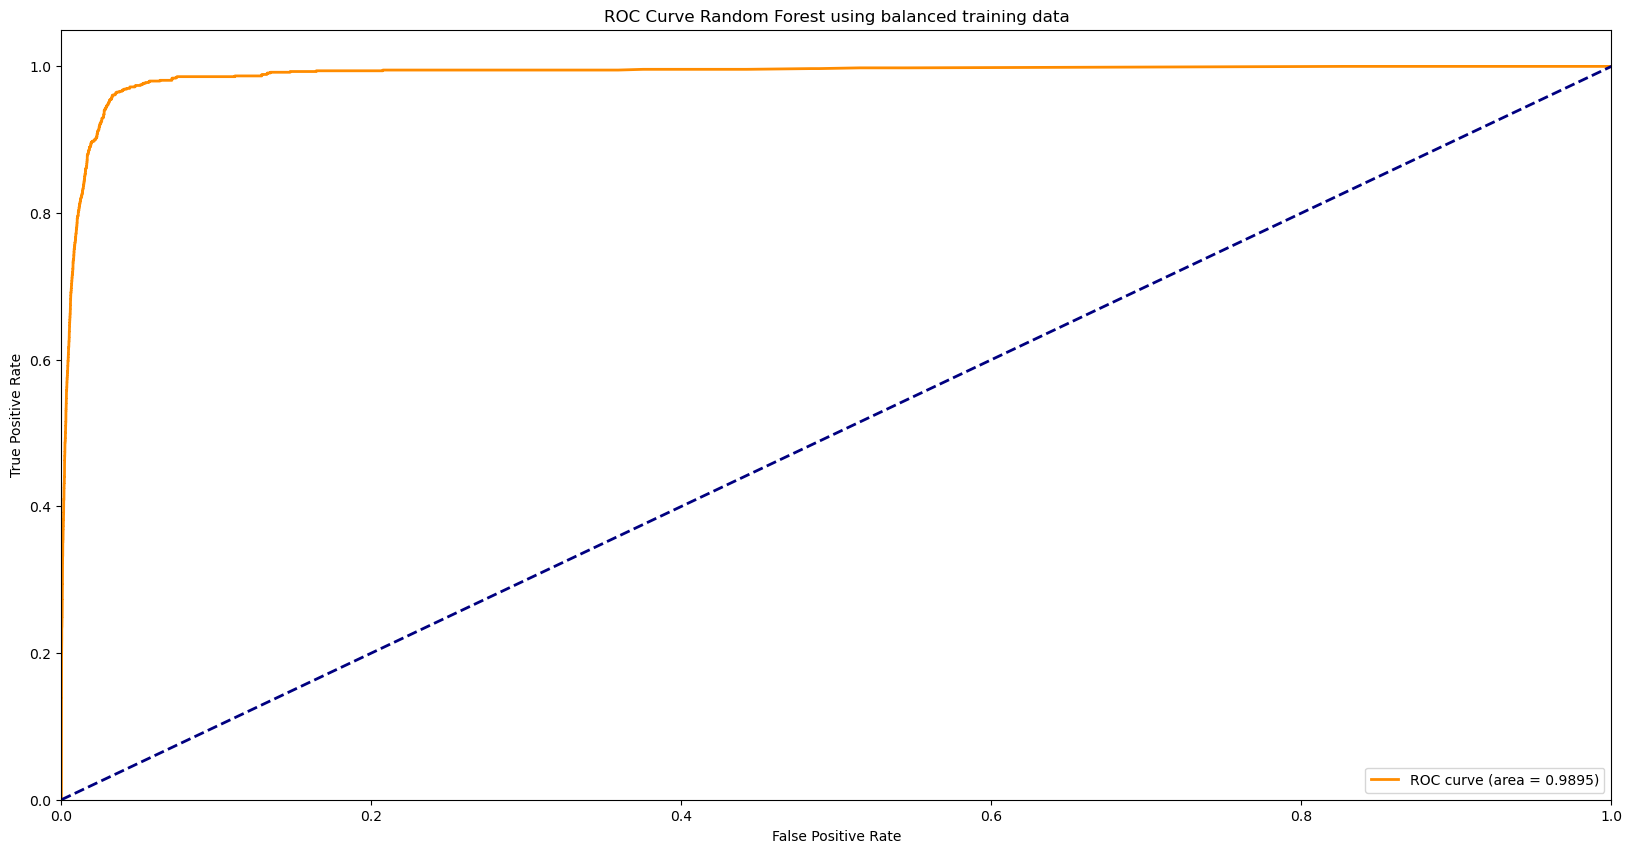

In [130]:
RF_model = fit_random_forest(imputed_train_x, imputed_train_y,is_balanced=True)
y_predicted = RF_model.predict(imputed_train_x)
y_prob = RF_model.predict_proba(imputed_train_x)

## confusion matrix
print(confusion_matrix(imputed_train_y, y_predicted))
## accuracy
accuracy = round(accuracy_score(imputed_train_y, y_predicted),4)
print("Accuracy score is: ",accuracy)
## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_train_y, y_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest using balanced training data')
plt.legend(loc="lower right")
plt.show()

[[14996   629]
 [   13   362]]
Accuracy score is:  0.9599
Misclassification rate is:  0.0401
AUC is:  0.9875


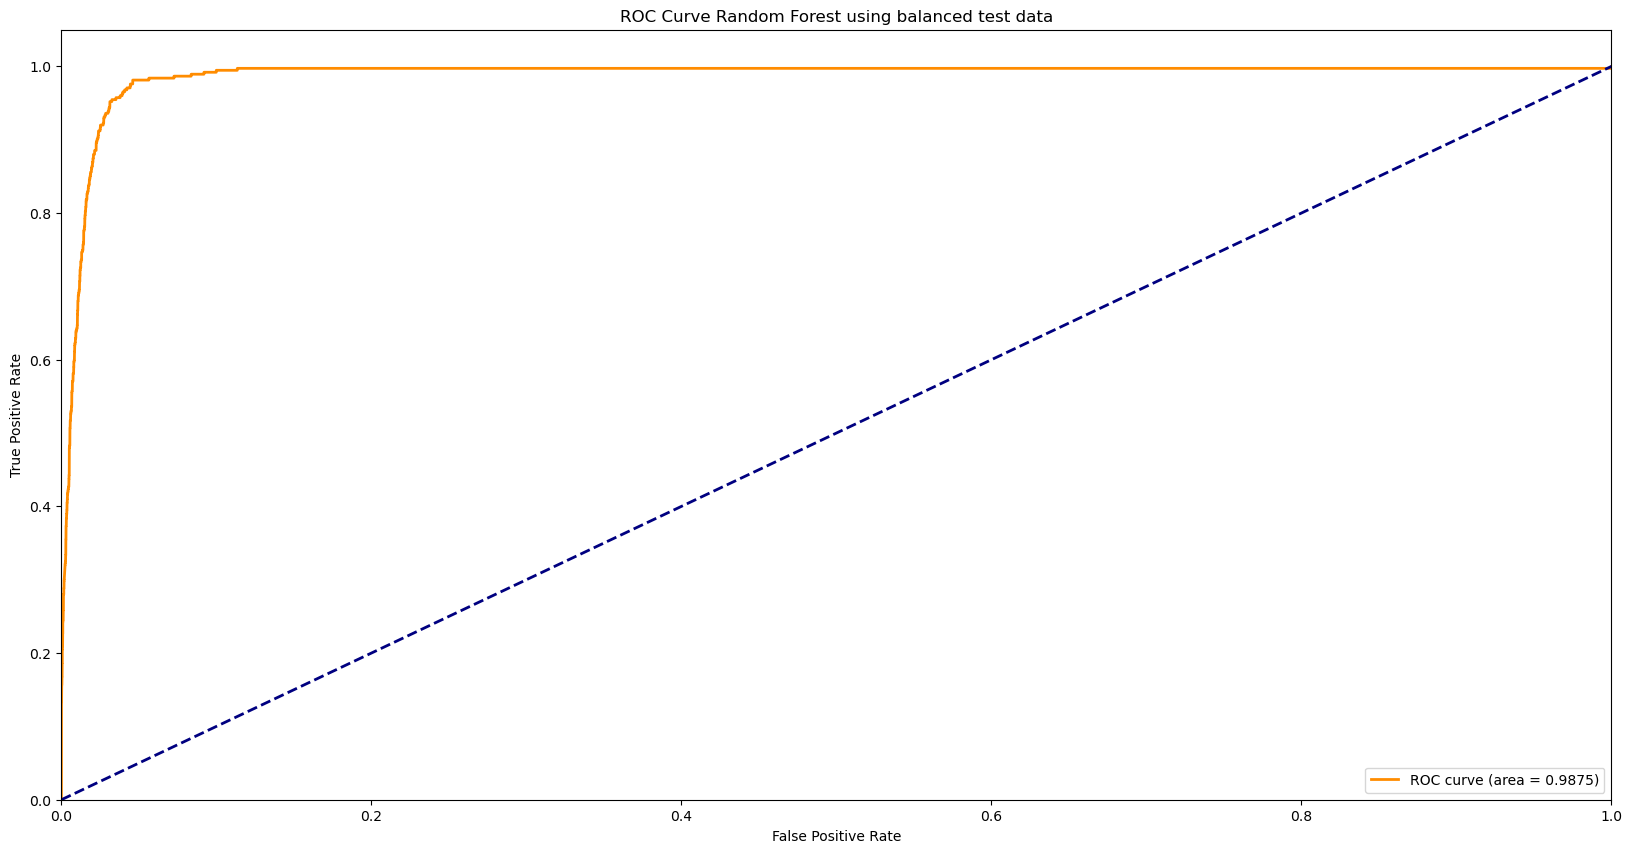

In [131]:
y_predicted = RF_model.predict(imputed_test_x)
y_prob = RF_model.predict_proba(imputed_test_x)

## confusion matrix
print(confusion_matrix(imputed_test_y, y_predicted))
## accuracy
accuracy = round(accuracy_score(imputed_test_y, y_predicted),4)
print("Accuracy score is: ",accuracy)
## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_test_y, y_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest using balanced test data')
plt.legend(loc="lower right")
plt.show()

In [132]:
print("Out of Bag error is: ",round(1-RF_model.oob_score_,4))
print("Test error is: ",round(1-accuracy,4))

## dataframe out of bag error and test error
df = pd.DataFrame({'Out of Bag error': [round(1-RF_model.oob_score_,4)], 'Test error': [1-accuracy]})
display(df)

Out of Bag error is:  0.0426
Test error is:  0.0401


Out of Bag error  Test error
0            0.0426      0.0401

Observation:

Train:

[[58974    26]
 [  435   565]]
Accuracy score is:  0.9923
Misclassification rate is:  0.0077
AUC is:  0.9867

[[56534  2466]
 [   31   969]]
Accuracy score is:  0.9584
Misclassification rate is:  0.0416
AUC is:  0.9895

Test: 

[[15612    13]
 [  179   196]]
Accuracy score is:  0.988
Misclassification rate is:  0.012
AUC is:  0.9942

[[14996   629]
 [   13   362]]
Accuracy score is:  0.9599
Misclassification rate is:  0.0401
AUC is:  0.9875

In C we know that the dataset is highly imbalanced, thus in c the model will tend to predict values to the majority class rather than the minority class in order to achieve a higher accuracy. As we can see with the test, the accuracy for the compensated model D is lower than the uncompensated one, however, it cannot tell the whole story. We can see ther eare less False Negatives, which means there are less predicted Negatives that are actually positive.

### (e) XGBoost and Model Trees

In [133]:
ss = StandardScaler()

# Standardize the training set
x_train = pd.DataFrame(ss.fit_transform(imputed_train_x), columns=imputed_train_x.columns)

# Standardize the testing set
# Note: Use transform() instead of fit_transform() to prevent data leakage
x_test = pd.DataFrame(ss.transform(imputed_test_x), columns=imputed_test_x.columns)

display(x_train.head())

aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
0  0.119381 -0.096307  2.310224 -0.004085 -0.041322 -0.051358 -0.010762   
1 -0.180697 -0.096307 -0.432859 -0.004089 -0.041322 -0.051358 -0.010762   
2 -0.125811 -0.096307 -0.432859 -0.004090 -0.041322 -0.051358 -0.010762   
3 -0.407928 -0.096307 -0.432859 -0.004091 -0.041322 -0.002669 -0.010762   
4  0.010572 -0.096307 -0.432857 -0.004080 -0.041322 -0.051358 -0.010762   

    ag_001    ag_002    ag_003  ...    ee_002    ee_003    ee_004    ee_005  \
0 -0.02837 -0.056929 -0.115643  ...  0.693832  0.524393  0.239087  0.070072   
1 -0.02837 -0.056929 -0.115643  ... -0.018901 -0.059135 -0.129021 -0.131171   
2 -0.02837 -0.056929 -0.115643  ... -0.144217 -0.092912 -0.016553  0.016053   
3 -0.02837 -0.056929 -0.115223  ... -0.385361 -0.388574 -0.381387 -0.351244   
4 -0.02837 -0.056929 -0.115643  ...  0.155656  0.036588 -0.032641 -0.039892   

     ee_006    ee_007    ee_008    ee_009    ef_000    eg_000  
0  0.008264 -0.107586 -0.143103 -0.175699 -0.020257 -0.023540  
1 -0.184975 -0.152281 -0.088650 -0.143927 -0.020257 -0.023540  
2 -0.009047 -0.107547 -0.094124 -0.164812 -0.020257 -0.023540  
3 -0.310645 -0.199493 -0.306838 -0.175699  0.916833  3.685328  
4 -0.040823 -0.018211  0.663519 -0.149900 -0.020257 -0.023540  

[5 rows x 170 columns]

In [134]:
xgb = XGBClassifier(objective='binary:logistic',use_label_encoder=False)
param_grid = {
    "reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

cv = KFold(n_splits=5, random_state=42, shuffle=True)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=cv, n_jobs=-1,scoring='roc_auc')

le = LabelEncoder()
y_train_encoded = le.fit_transform(imputed_train_y)
print(y_train_encoded)

grid_search.fit(x_train, y_train_encoded)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
print("Best estimator found: ", grid_search.best_estimator_)

## best alpha
best_alpha = grid_search.best_params_['reg_alpha']

## best model
best_model = grid_search.best_estimator_

[0 0 0 ... 0 0 0]


/Users/lucast/opt/anaconda3/envs/base1/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/lucast/opt/anaconda3/envs/base1/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters found:  {'reg_alpha': 5}
Best accuracy found:  0.9915741327023291
Best estimator found:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


[[59000     0]
 [   27   973]]
Accuracy score is:  0.9996
Misclassification rate is:  0.0004
AUC is:  0.9997


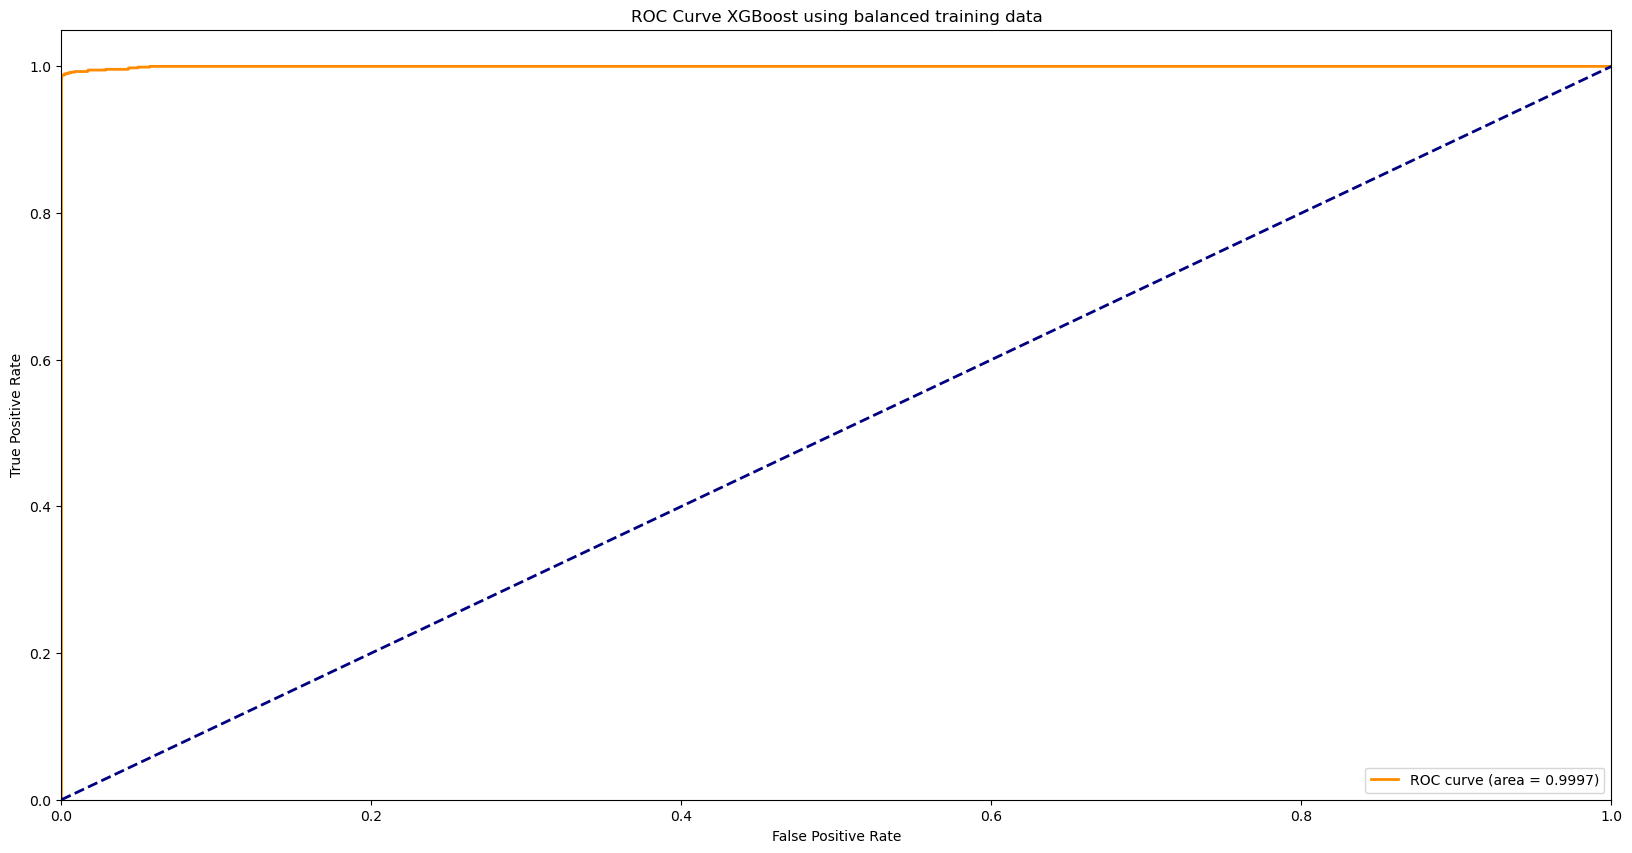

In [135]:
y_train_pred = best_model.predict(x_train)
y_train_prob = best_model.predict_proba(x_train)

y_train_pred = le.inverse_transform(y_train_pred)
## confusion matrix
print(confusion_matrix(imputed_train_y, y_train_pred))

## accuracy
accuracy = round(accuracy_score(imputed_train_y, y_train_pred),4)
print("Accuracy score is: ",accuracy)

## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_train_y, y_train_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost using balanced training data')
plt.legend(loc="lower right")
plt.show()

[[15608    17]
 [   82   293]]
Accuracy score is:  0.9938
Misclassification rate is:  0.0062
AUC is:  0.9961


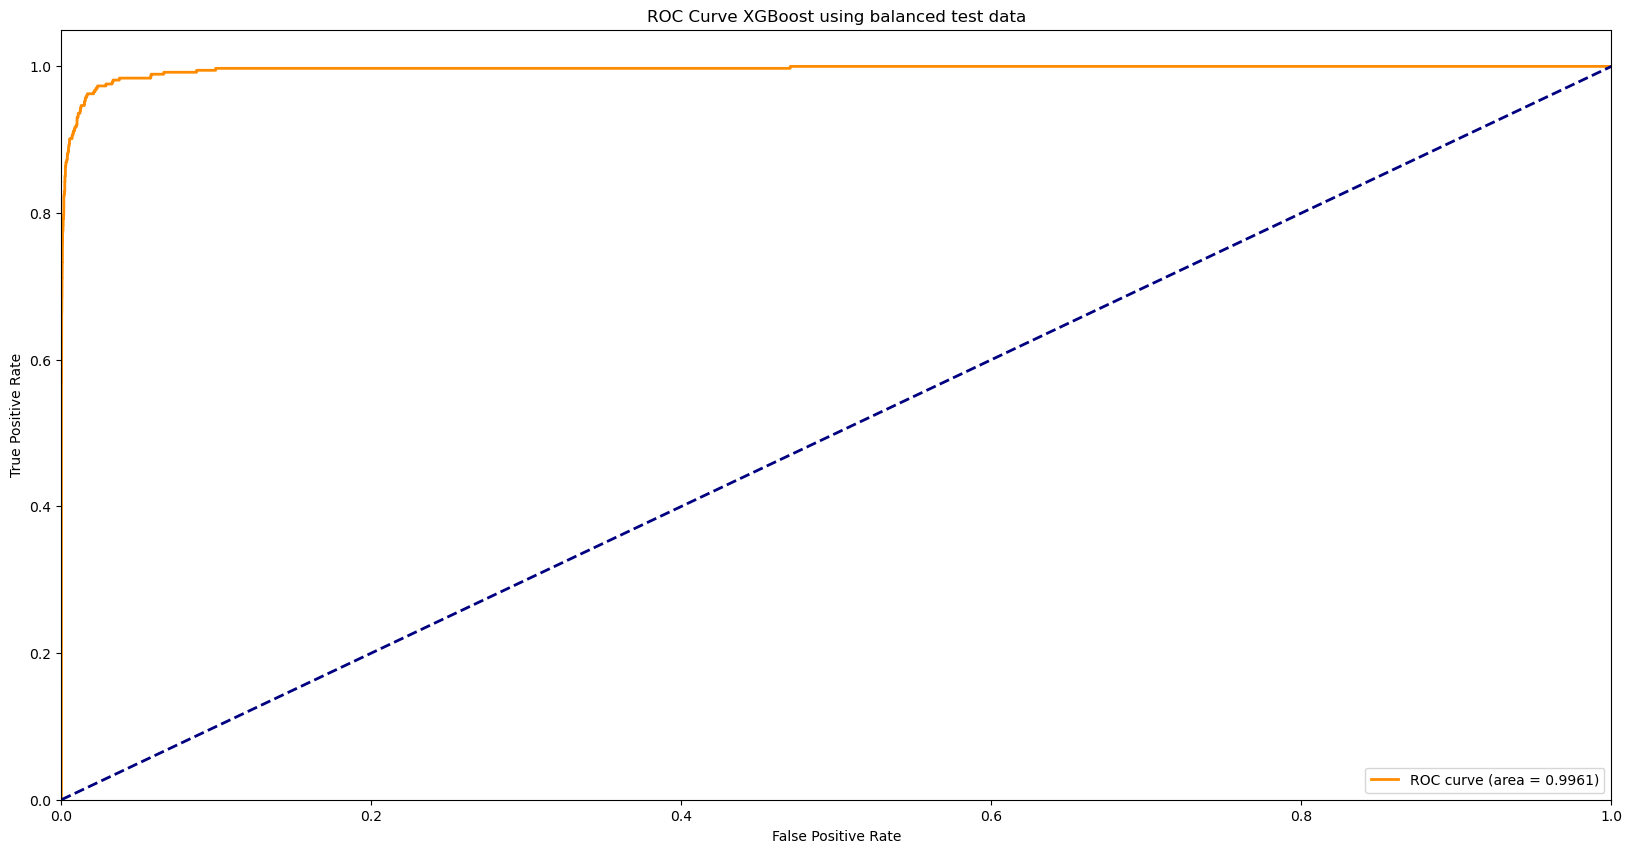

In [136]:
y_test_pred = best_model.predict(x_test)
y_test_prob = best_model.predict_proba(x_test)

y_test_pred = le.inverse_transform(y_test_pred)
## confusion matrix
print(confusion_matrix(imputed_test_y, y_test_pred))

## accuracy
accuracy = round(accuracy_score(imputed_test_y, y_test_pred),4)
print("Accuracy score is: ",accuracy)

## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(imputed_test_y, y_test_prob[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost using balanced test data')
plt.legend(loc="lower right")
plt.show()

### (f) Use SMOTE to pre-process your data

In [137]:
## Preprocessing
y_train = df_train['class'].replace({'pos':1, 'neg':0})
y_test = df_test['class'].replace({'pos':1, 'neg':0})
print(y_train)

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64


In [138]:
xgb_classifier = XGBClassifier(objective='binary:logistic',use_label_encoder=False)

pipeline = Pipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['classifier', xgb_classifier]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)


param_grid = {
    "classifier__reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold,
                           n_jobs=-1, scoring='roc_auc')


grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

print("Best accuracy found: ", grid_search.best_score_)
print("Best estimator found: ", grid_search.best_estimator_)

## best alpha
best_alpha = grid_search.best_params_['classifier__reg_alpha']

## best model

/Users/lucast/opt/anaconda3/envs/base1/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/lucast/opt/anaconda3/envs/base1/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters found:  {'classifier__reg_alpha': 2}
Best accuracy found:  0.9876991525423728
Best estimator found:  Pipeline(steps=[('smote', SMOTE(random_state=11)),
                ['classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                    

[[59000     0]
 [    3   997]]
Accuracy score is:  1.0
Misclassification rate is:  0.0
AUC is:  1.0


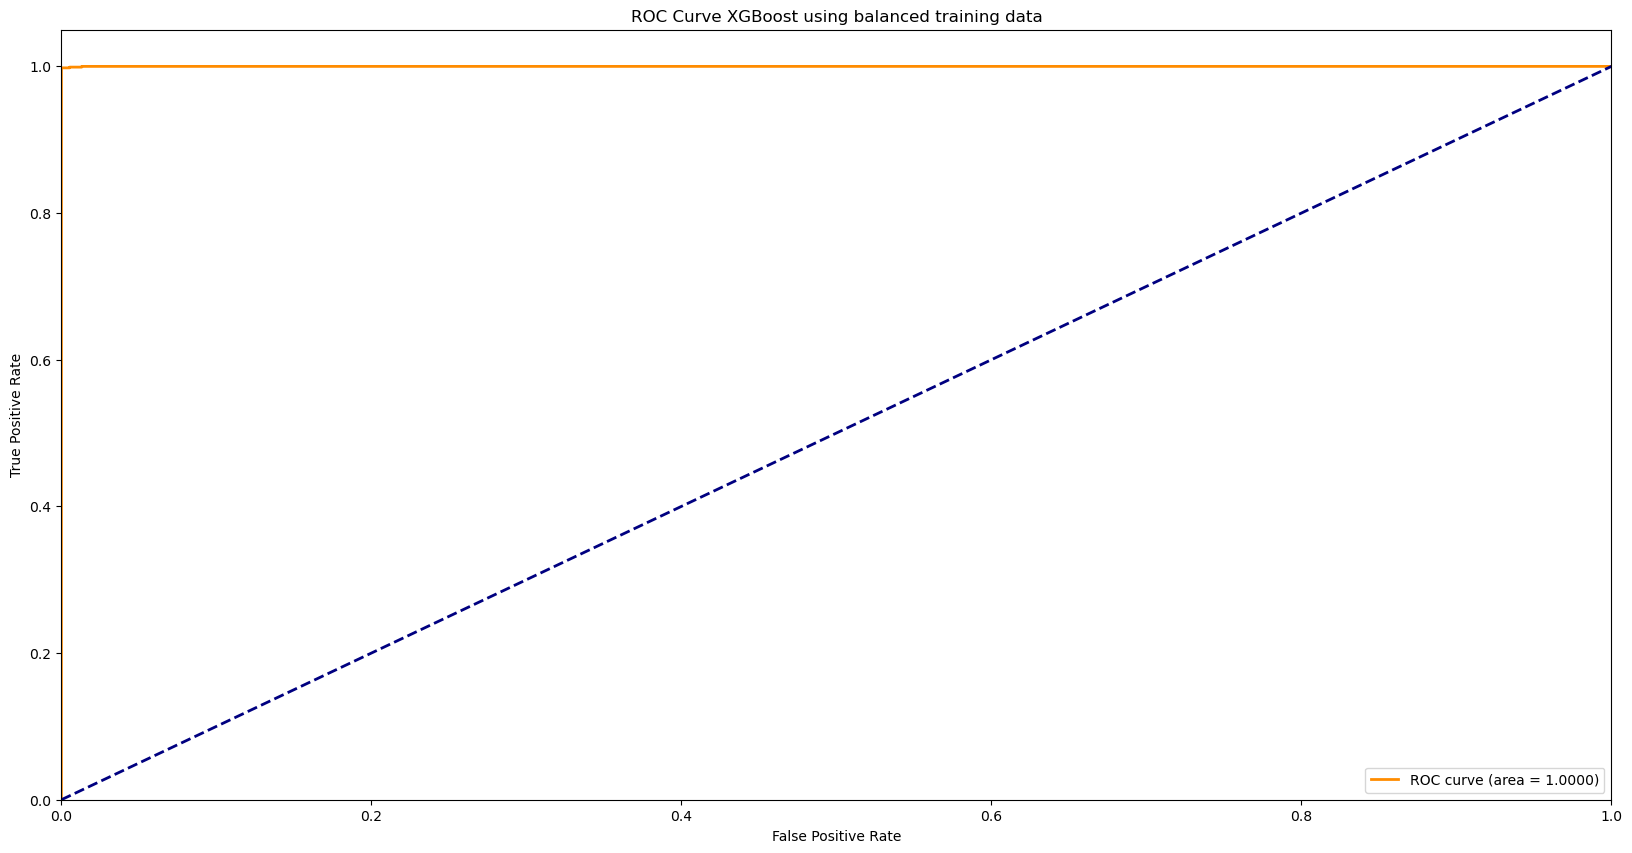

In [139]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)
y_train_prob = best_model.predict_proba(x_train)

## confusion matrix
print(confusion_matrix(y_train, y_train_pred))

## accuracy
accuracy = round(accuracy_score(y_train, y_train_pred),4)
print("Accuracy score is: ",accuracy)

## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost using balanced training data')
plt.legend(loc="lower right")
plt.show()

[[15571    54]
 [   56   319]]
Accuracy score is:  0.9931
Misclassification rate is:  0.0069
AUC is:  0.994


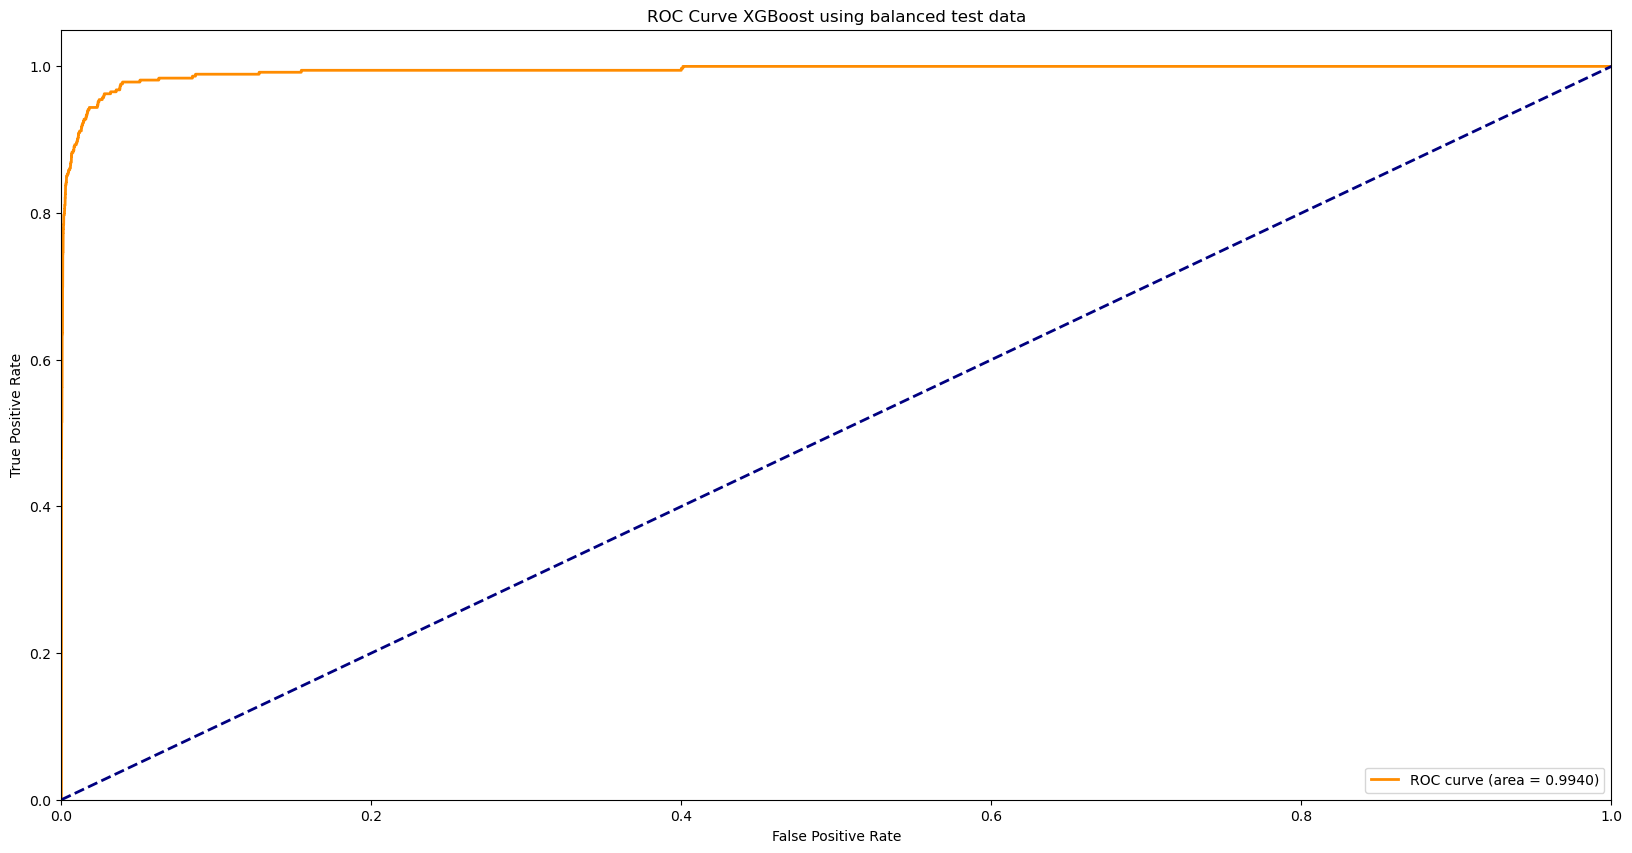

In [140]:
y_test_pred = best_model.predict(x_test)
y_test_prob = best_model.predict_proba(x_test)

## confusion matrix
print(confusion_matrix(y_test, y_test_pred))

## accuracy
accuracy = round(accuracy_score(y_test, y_test_pred),4)
print("Accuracy score is: ",accuracy)

## misclassification
print("Misclassification rate is: ",round(1-accuracy,4))

## roc and auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("AUC is: ",round(roc_auc,4))

## plot roc
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost using balanced test data')
plt.legend(loc="lower right")
plt.show()

Comparison with 1E

Train:

[[59000     0]
 [   27   973]]
Accuracy score is:  0.9996
Misclassification rate is:  0.0004
AUC is:  0.9997

[[59000     0]
 [    3   997]]
Accuracy score is:  1.0
Misclassification rate is:  0.0
AUC is:  1.0

Test:

[[15608    17]
 [   82   293]]
Accuracy score is:  0.9938
Misclassification rate is:  0.0062
AUC is:  0.9961


[[15571    54]
 [   56   319]]
Accuracy score is:  0.9931
Misclassification rate is:  0.0069
AUC is:  0.994

As we can see, the Train dataset had a higher AUC score using the SMOTE. However, it did not translate into the Test dataset as we can see that model in question F result lower AUC than the model in question E. Potential cause could be:

Overfitting: SMOTE can generate synthetic data points that are very similar to the existing data points, which can lead to overfitting of the model on the training data. This can result in a model that performs well on the training data but poorly on the test data.

## 2. ISLR 6.6.3

Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

a. iv, steadily decrease, the estimated coefficients will go from 0 to OLS when value of s increases, therefore causing training RSS to decrease.

b. ii. Decrease initially and then eventually start increasing in a U shape. Test RSS will hit a point of inflection after initial decreas and later RSS will start to increase.

c. iii. Steadily increases. B is close to zero in the beginning and that means that there are no variance in the beginning, after that variance will steadily increase.

d. iv. Steadily decreases. As explained as c, as variance increases, bias will decrease(inverse relationship due to bias-variance tradeoff)

e. v remain constant since irreducible error just like it sounds is irreducible and is an act of god according to professor and therefore it will remain as a constant value.

## 3. ISLR 6.6.5

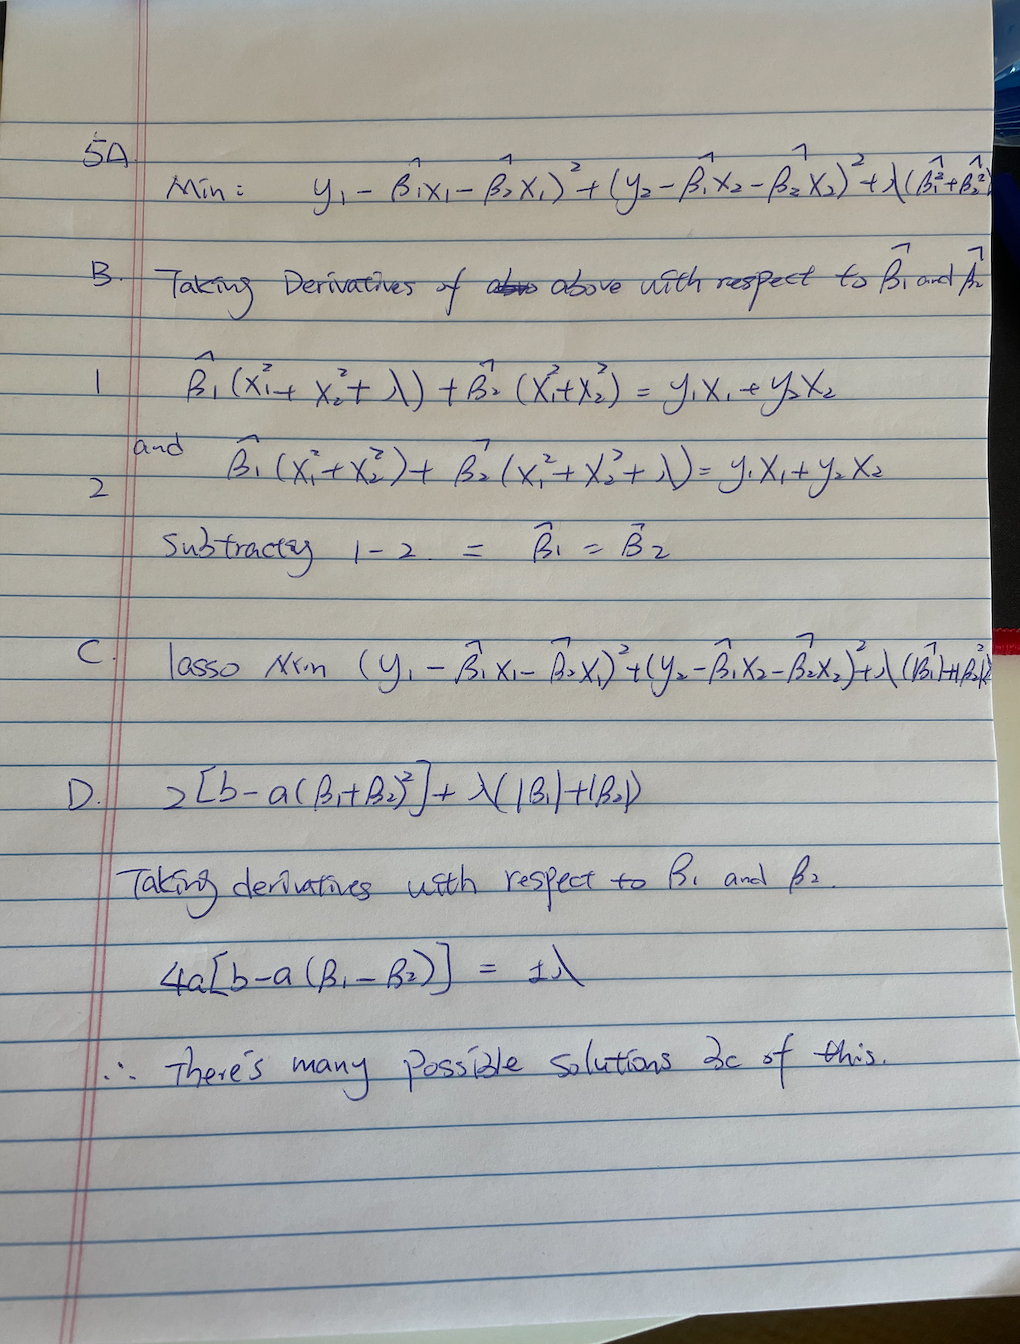

In [141]:
##display a picture from folder
from IPython.display import Image
Image(filename='Screenshot 2023-04-02 at 5.37.24 PM.png')

## 4. ISLR 8.4.5

Majority polling is that anything above the possibilities of 0.5 will be classified as true and false otherwise. Here there are 4 False and 6 trues, therefore we classifiy this single class as Red.

Average Probability is taking the average of the giving 10 possiblities. Average equals to 0.45 and since it is lower than 0.5, the single class classification will be Green.

## 5. ISLR 9.7.3

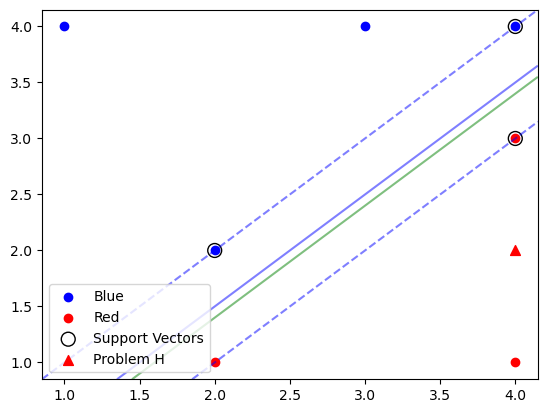

Intercept: [-1.0004096]
Coefficients: [[ 1.9998464 -1.9996928]]


In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = np.array([[3, 4, 0],
                 [2, 2, 0],
                 [4, 4, 0],
                 [1, 4, 0],
                 [2, 1, 1],
                 [4, 3, 1],
                 [4, 1, 1]])

X = data[:, :2]
y = data[:, 2]

# Train SVM with a linear kernel
svm = SVC(kernel='linear', C=1000)
svm.fit(X, y)

# Plot the data
fig, ax = plt.subplots()
colors = ['blue', 'red']
for i, color in enumerate(colors):
    idx = np.where(y == i)
    ax.scatter(X[idx, 0], X[idx, 1], c=color, label=f"{color.capitalize()}")

# Plot the decision boundary and margins
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")

# a hyperplane that is not optimal
lines2 = ax.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Problem H")

ax.legend()
plt.show()

print("Intercept:", svm.intercept_)
print("Coefficients:", svm.coef_)

B. THe solid blue line represents the optimal seperating hyperplane.

C. Beta 0 equals to 1, Beta 1 equals to -1, Beta 2 equals to 2 

Beta 0 + Beta1X1 + Beta2X2 greater than 0 is regarded as red, otherwise it is blue

D. Dashed line is the maximal margin hyperplane here.

E. As we can see in the legend, the circle ones are Support Vectors.

F. We can see that the lower right point is far away from the decision boundary labeled by the suport Vectors and therefore a light change of the point will not affect the maximal margin hyperplane.

G. The green line is the non-optimal hyperplane.

H. The additional Red point is now marked as a red triangle at (4, 2). The data is not linearly separable because adding the new point in the middle of the Blue points creates an XOR pattern.

XOR patterns cannot be separated by a single straight line (i.e., linearly), as there is no single line that can be drawn to separate the Red and Blue points without misclassifying at least one point. To classify such patterns, non-linear classifiers or kernel methods are needed.